In [32]:
import os
import sys
sys.path.append("../../../")

from rnns_architectures.intrinsec import *
from rnns_architectures.utils import *
from IT_SHAP import TFWrapper, XAI_utils, utils_visualizations_IT_SHAP
from IT_SHAP.IT_SHAP import local_report
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import random, os, json
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
time = 8
norm = "robustNorm"

# EXPLAINABILITY. IT-SHAP

In [3]:
features =  ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20',
       'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41',
       'pm42', 'pm43', 'pm44', 'pm87']

print("# of features: ", len(features))

# Show the features in the plot with a clinical order
new_order = ['vm1', 'vm3', 'vm4', 'vm5', 'vm13', 'vm20',
       'vm28', 'vm62', 'vm136', 'vm146', 'vm172', 'vm174', 'vm176', 'pm41',
       'pm42', 'pm43', 'pm44', 'pm87']

feature_idx = {feature: idx for idx, feature in enumerate(features)}
reordered_indices = [feature_idx[feature] for feature in new_order]

# of features:  18


### Final name of the variables in the visualization 

In [4]:
final_order = [ "Heart rate",
    "Systolic BP",
    "Diastolic BP",
    "MAP",
    "Cardiac output",
    "SpO2",
    "RASS",
    "PIP",
    "Lactate arterial",
    "Lactate venous",
    "INR",
    "Serum glucose",
    "C-reactive protein",
    "Dobutamine",
    "Milrinone",
    "Levosimendan",
    "Theophyllin",
    "Non-opioid analgesics"]

## Load each split and model and save the IT-SHAP values

# SPLIT 1

In [5]:
directory = './Results_LSTM'
split = "s1"
norm = "robustNorm"

### POPULATION

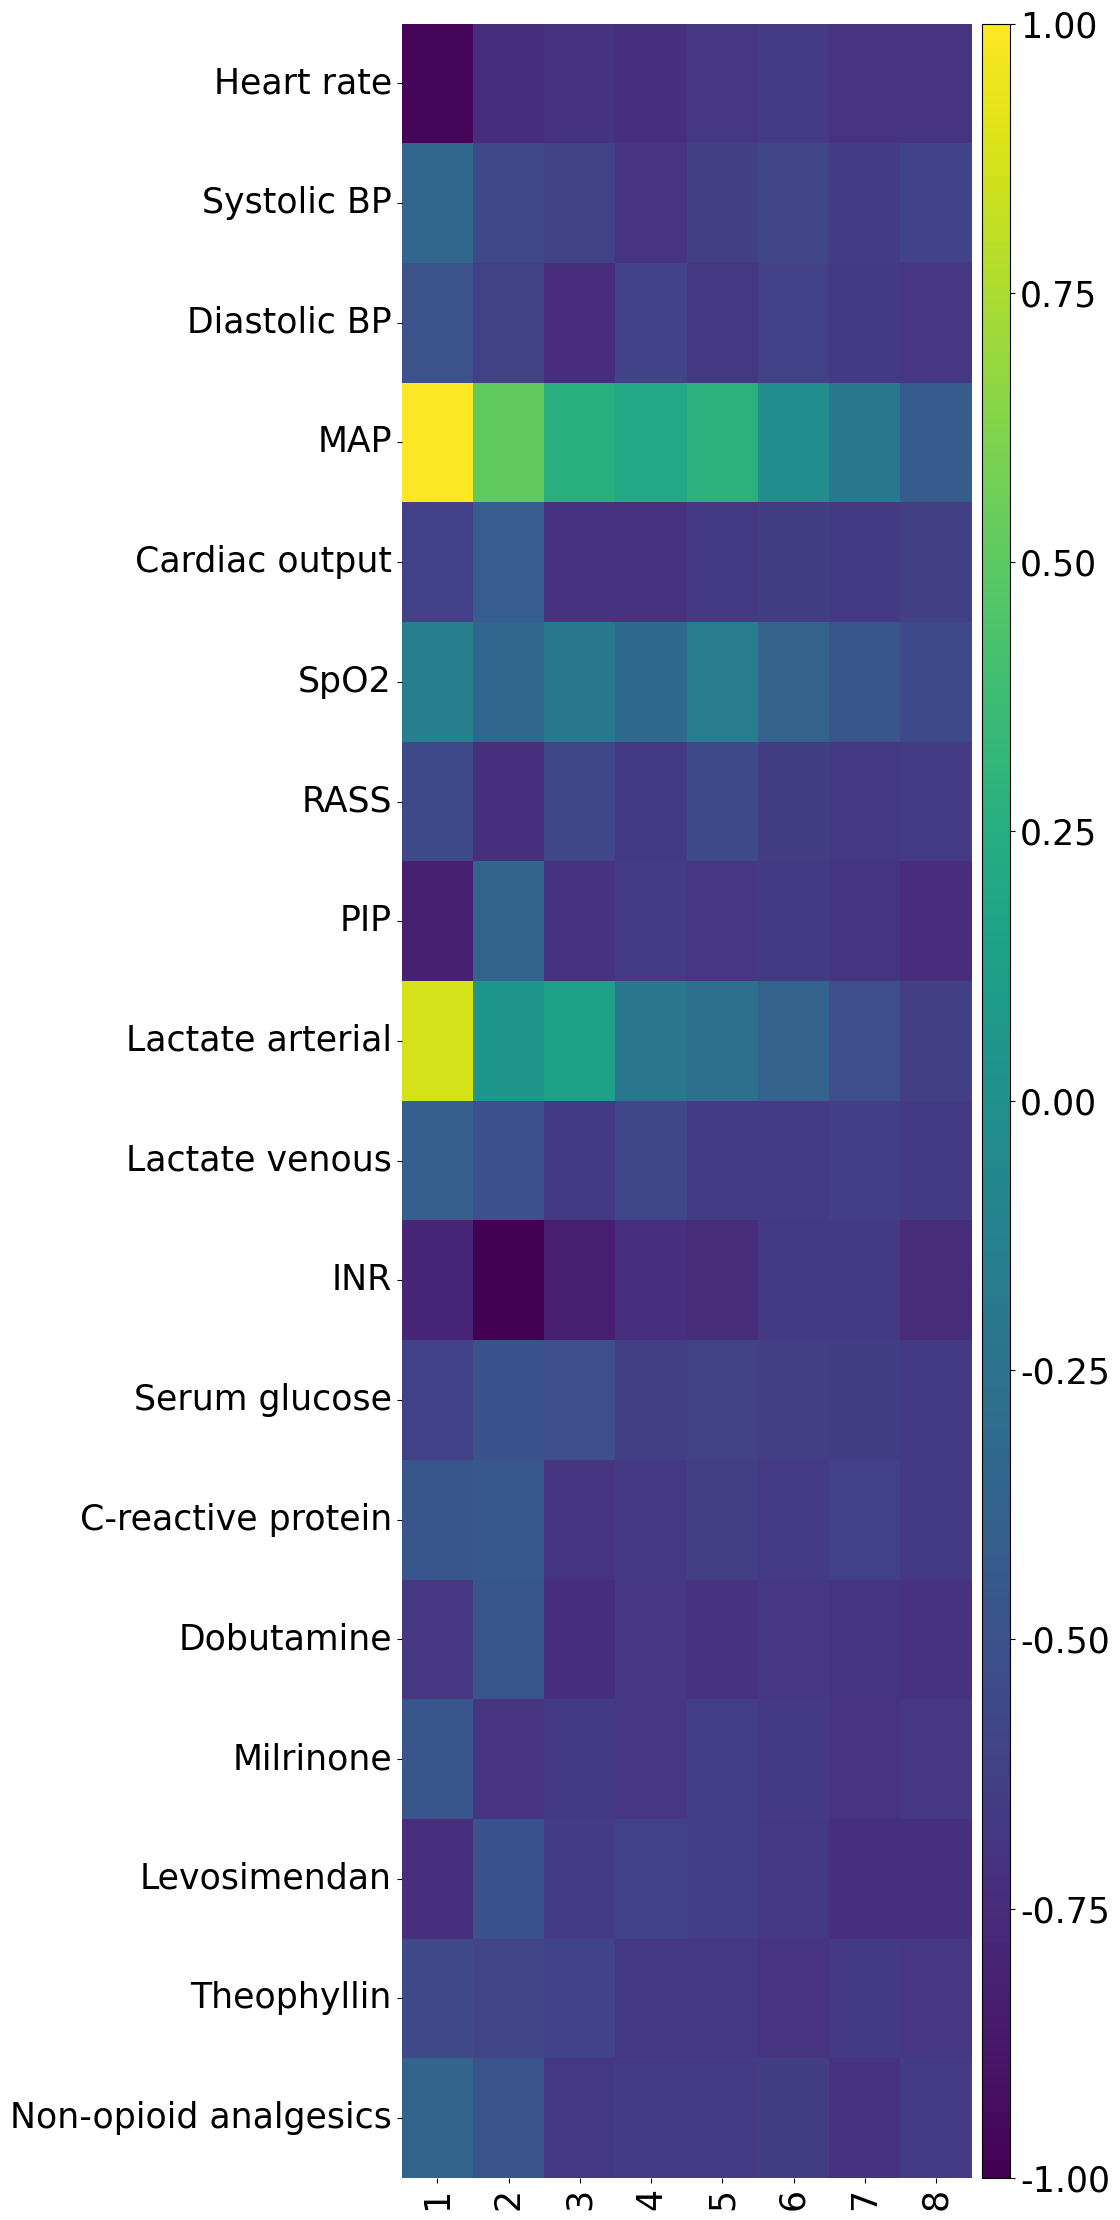

In [6]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### PATIENTS WITH CIRCULATORY FAILURE

In [7]:
ign_pat = []
X_test = np.load(f"../../../DATA/CIRCULATORY/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/CIRCULATORY/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1262, 8)

In [8]:
import copy
list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #Noncirculatory patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #circulatory patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the CIRCULATORY data without normalization**

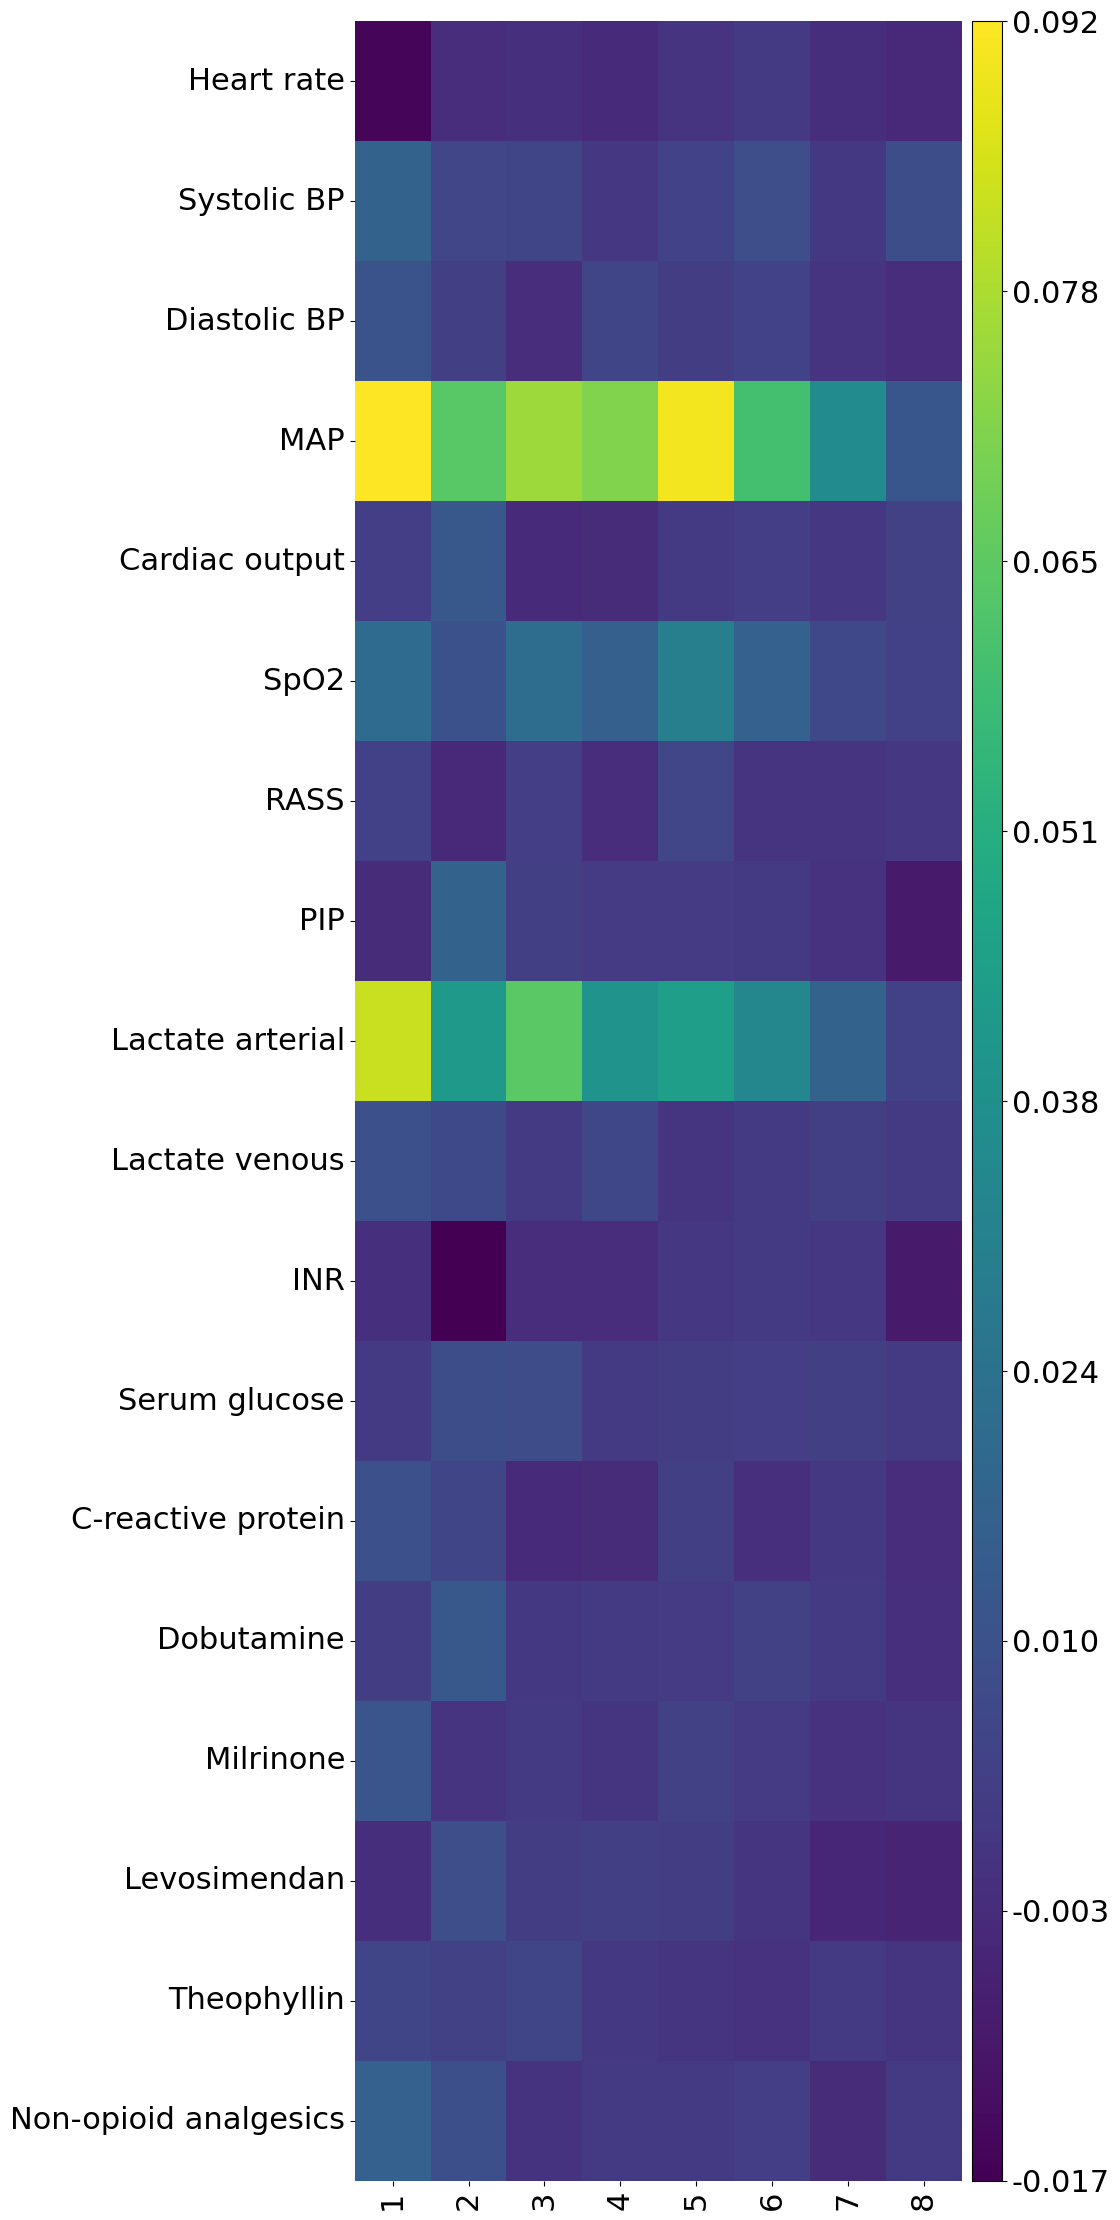

In [9]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", 
                                                    time,
                                                    save_img=False)

**Visualize the CIRCULATORY data with normalization**

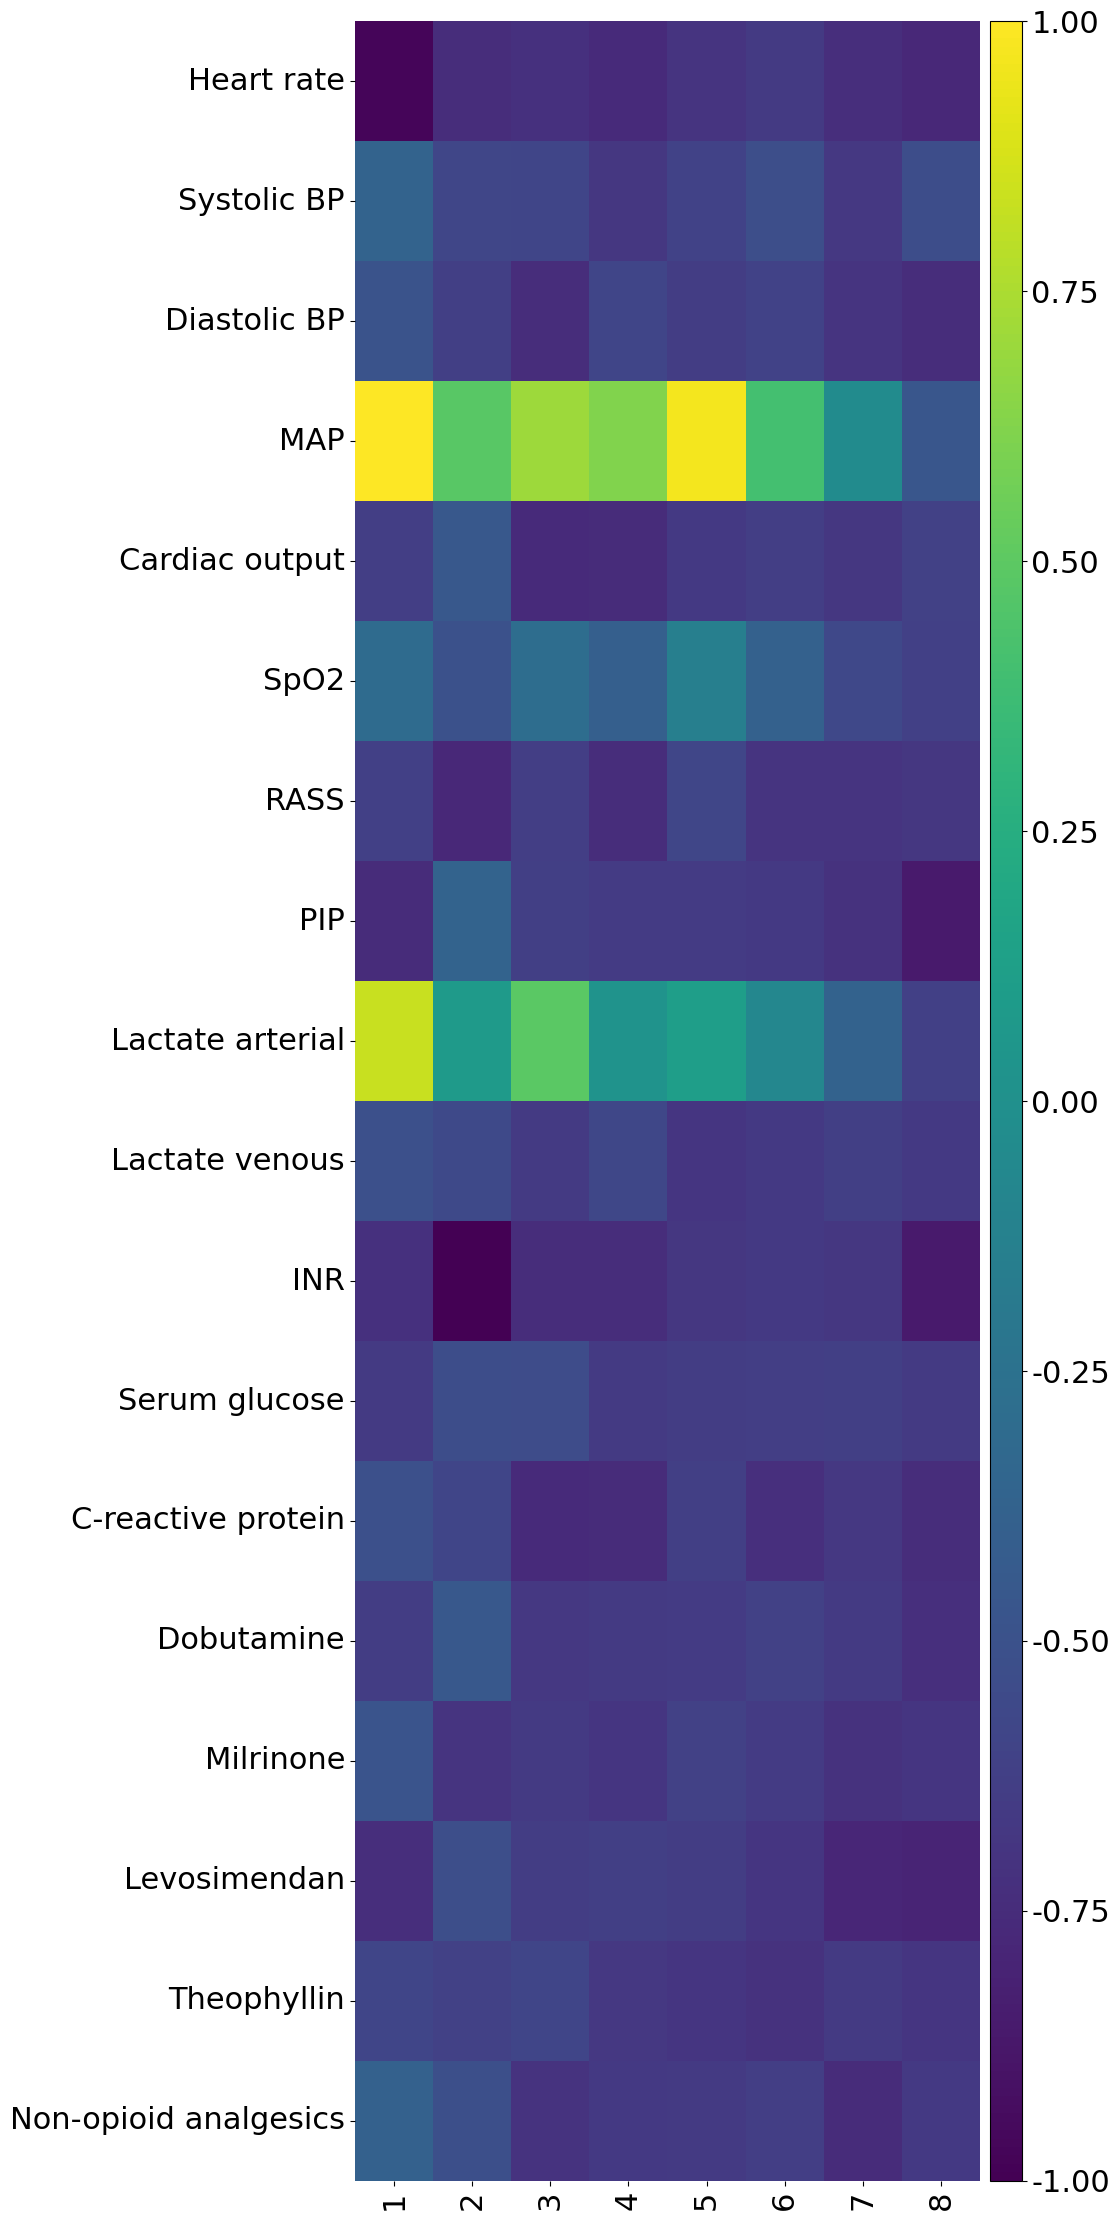

In [10]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices,
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_circ_lstm.pdf",
               time,
               save_img=True
) 

## PATIENTS WITHOUT CIRCULATORY FAILURE

In [11]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #Circulatory patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Noncirculatory patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non CIRCULATORY data without normalization**

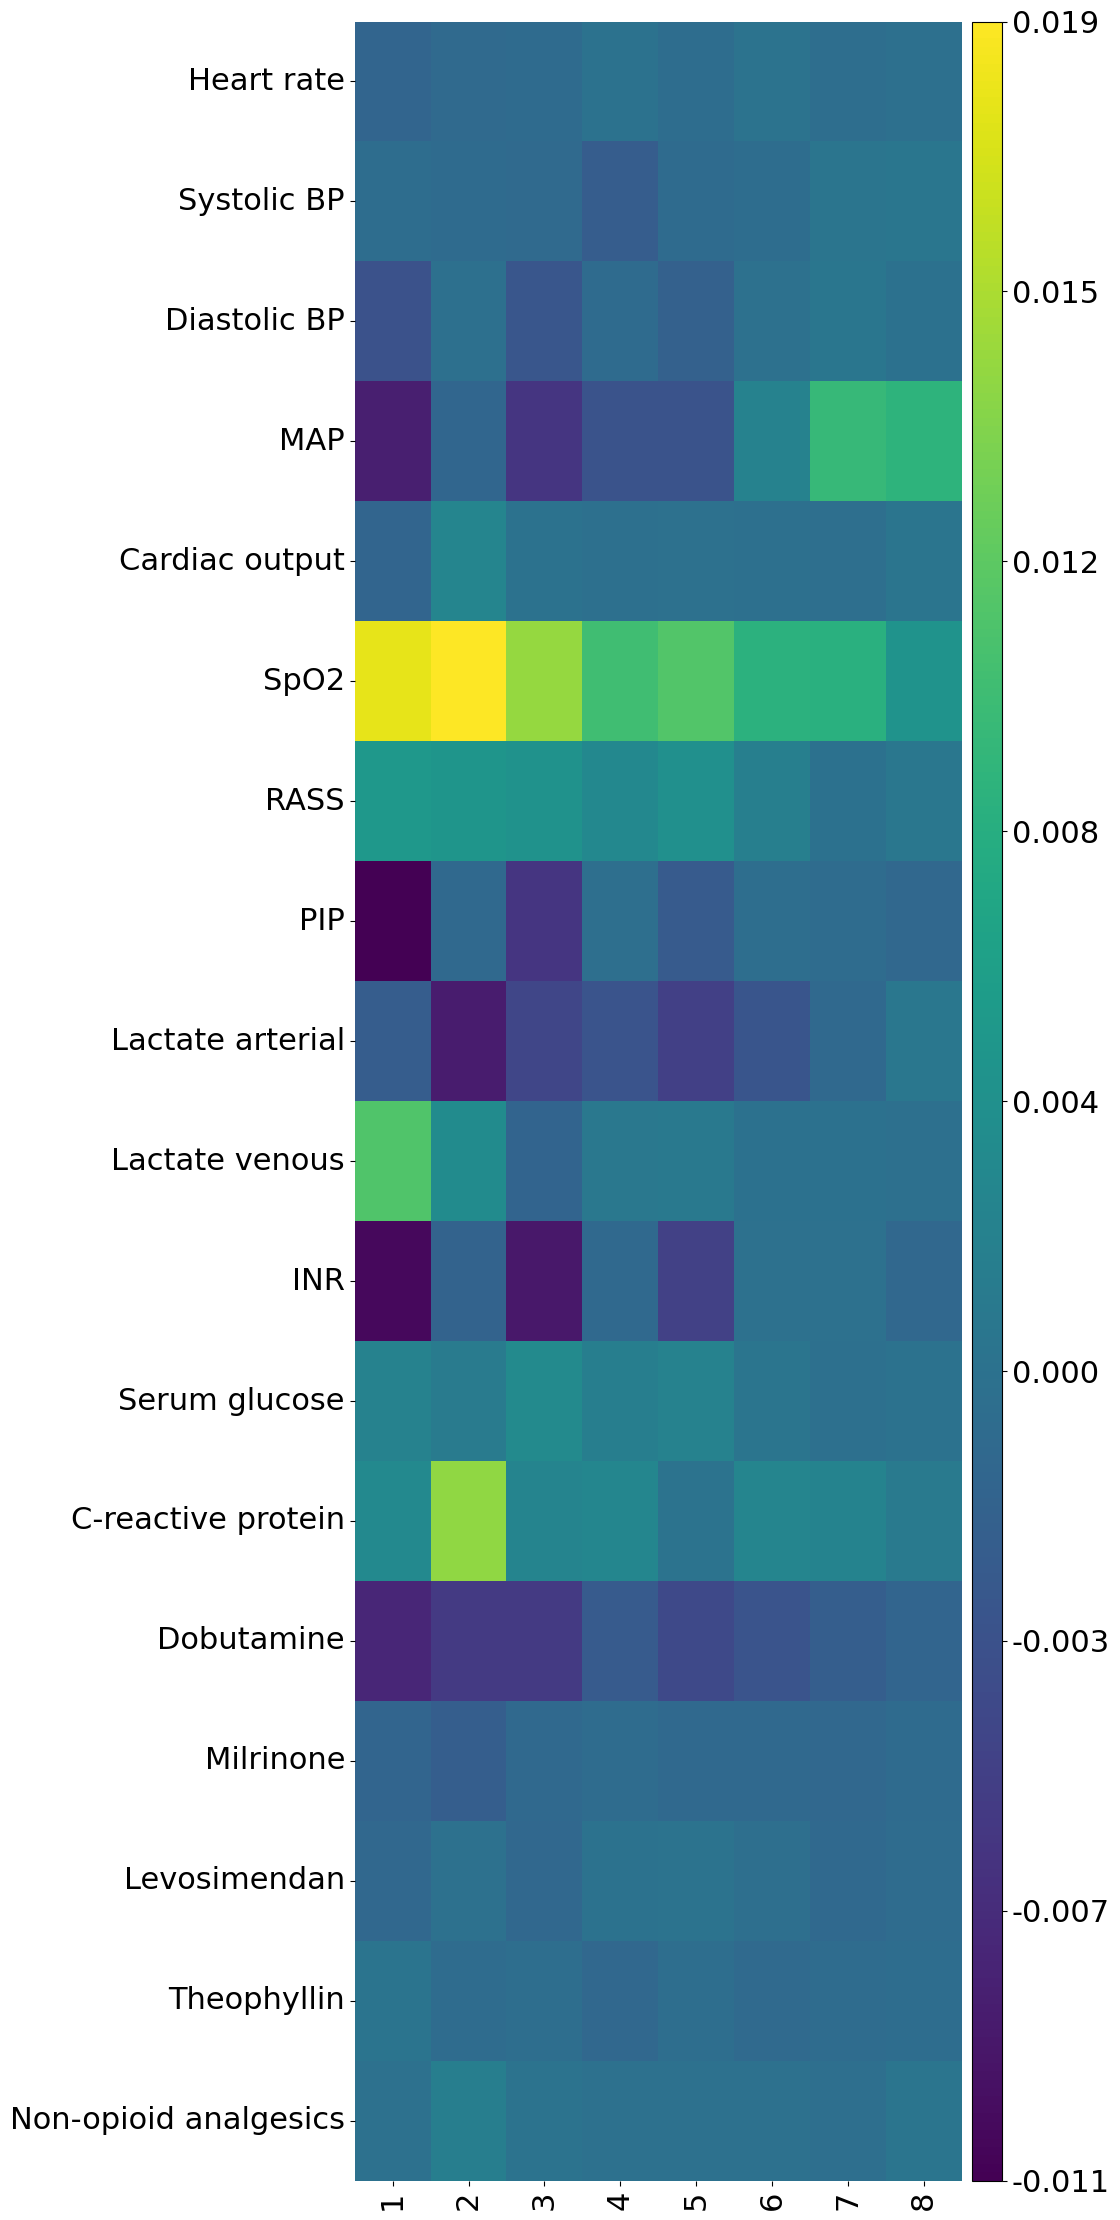

In [12]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non CIRCULATORY data with normalization**

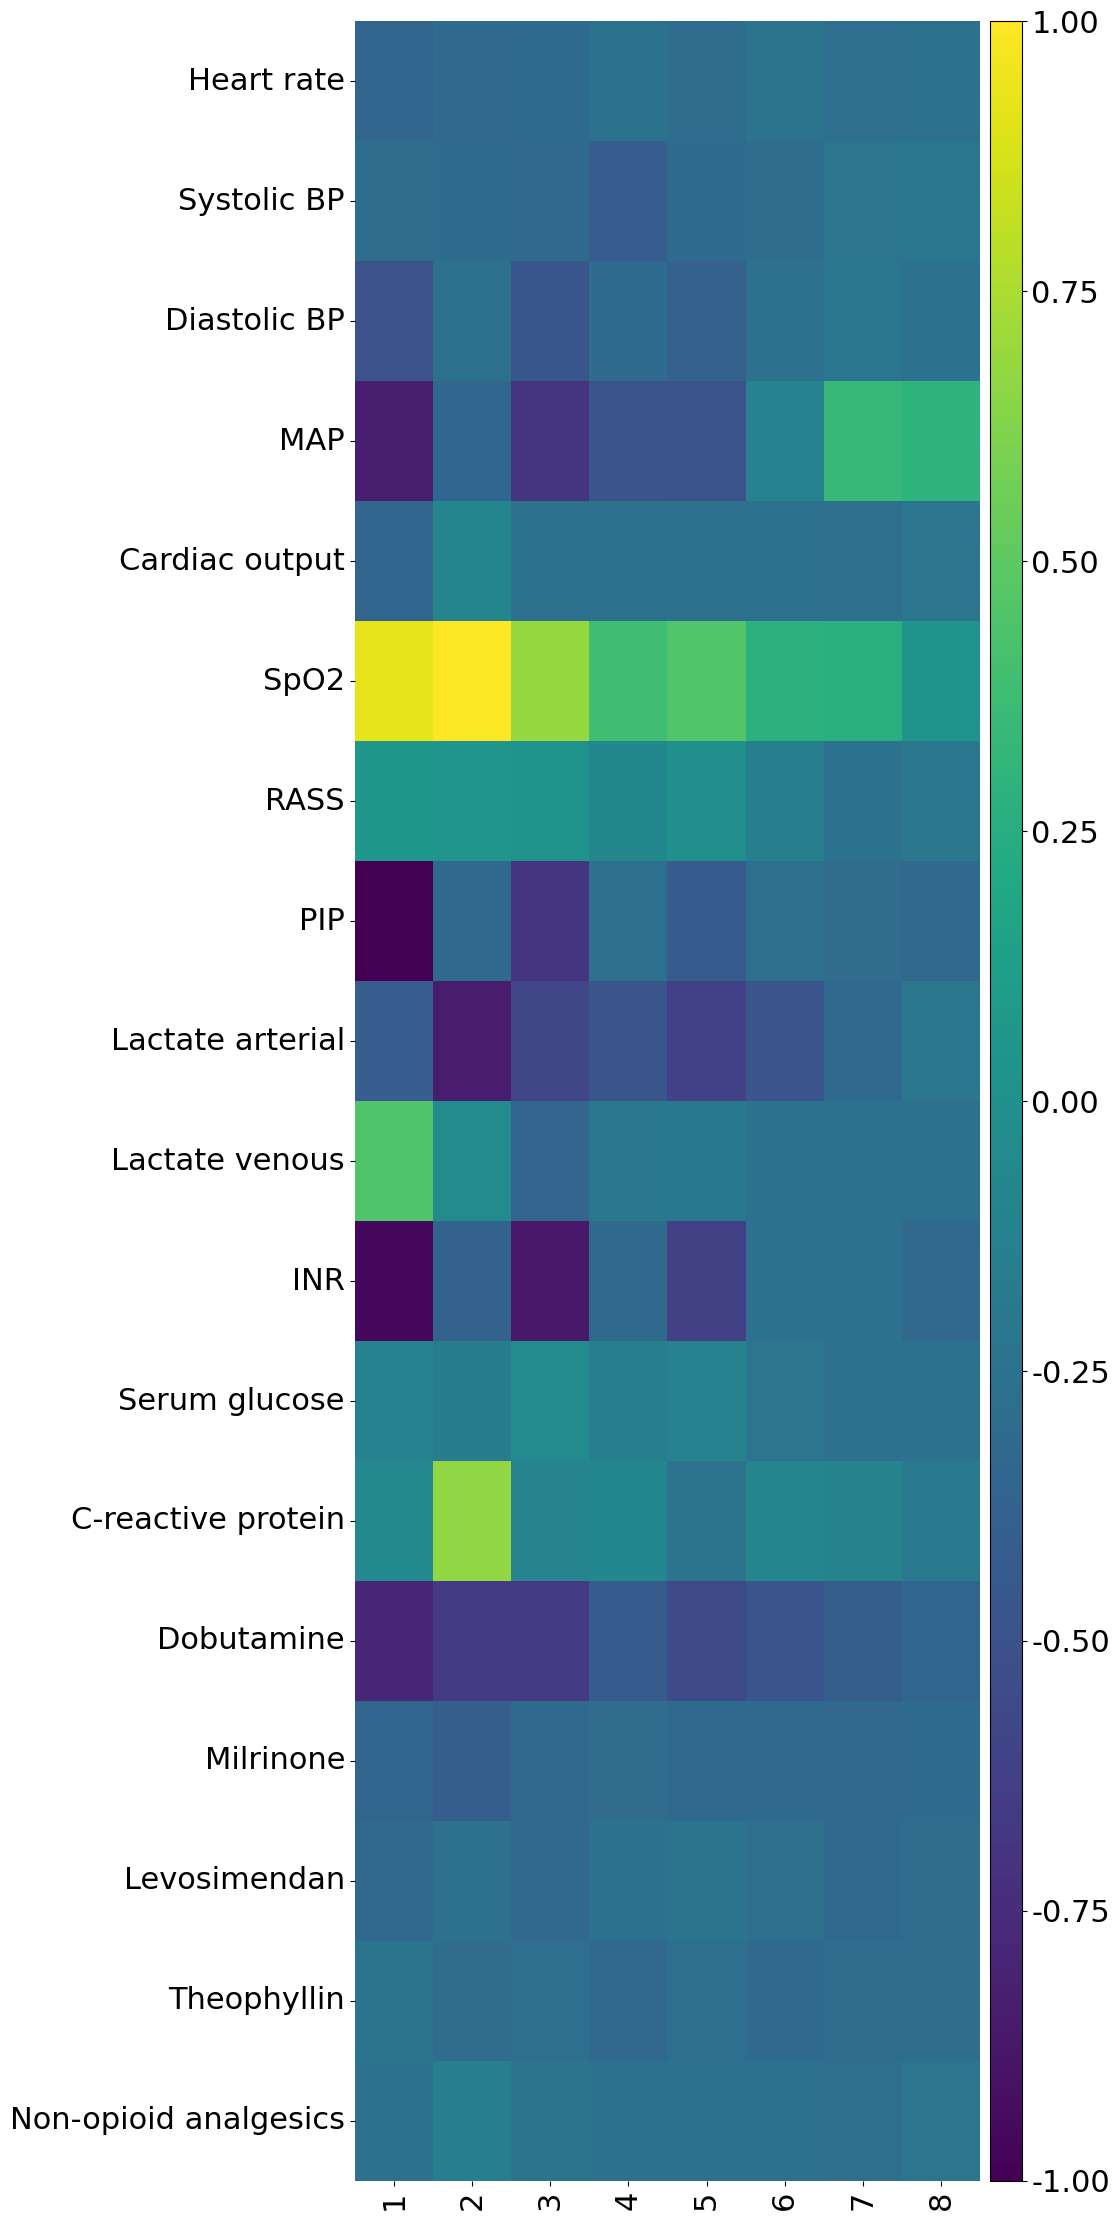

In [13]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nocirc_lstm.pdf", 
               time,
               save_img=True
) 

# SPLIT 2

In [14]:
directory = './Results_LSTM'
split = "s2"
norm = "robustNorm"

### POPULATION

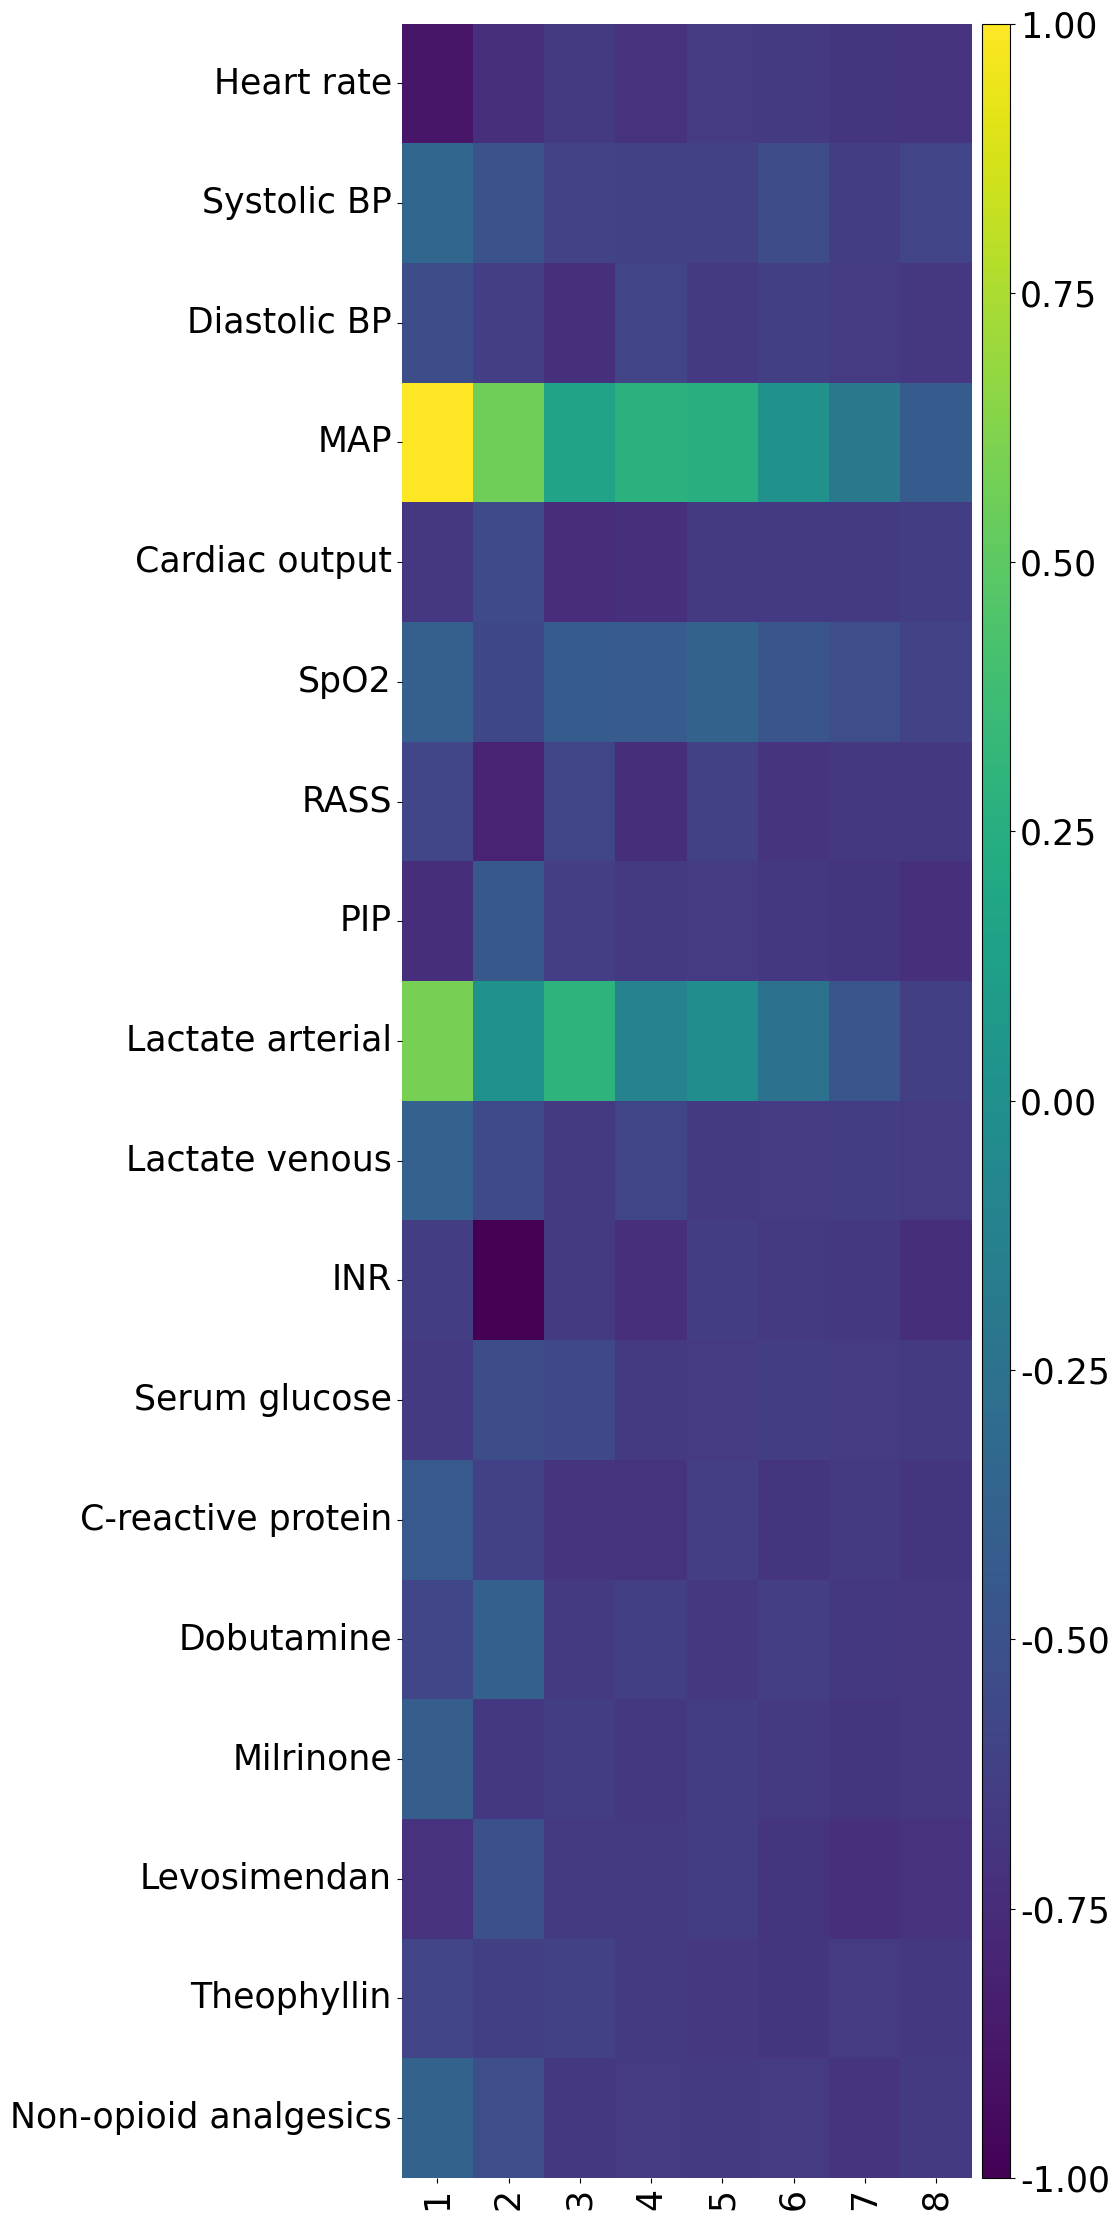

In [15]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### PATIENTS WITH CIRCULATORY FAILURE

In [16]:
ign_pat = []
X_test = np.load(f"../../../DATA/CIRCULATORY/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/CIRCULATORY/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1262, 8)

In [17]:
import copy

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #NonAMR patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #AMR patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the CIRCULATORY data without normalization**

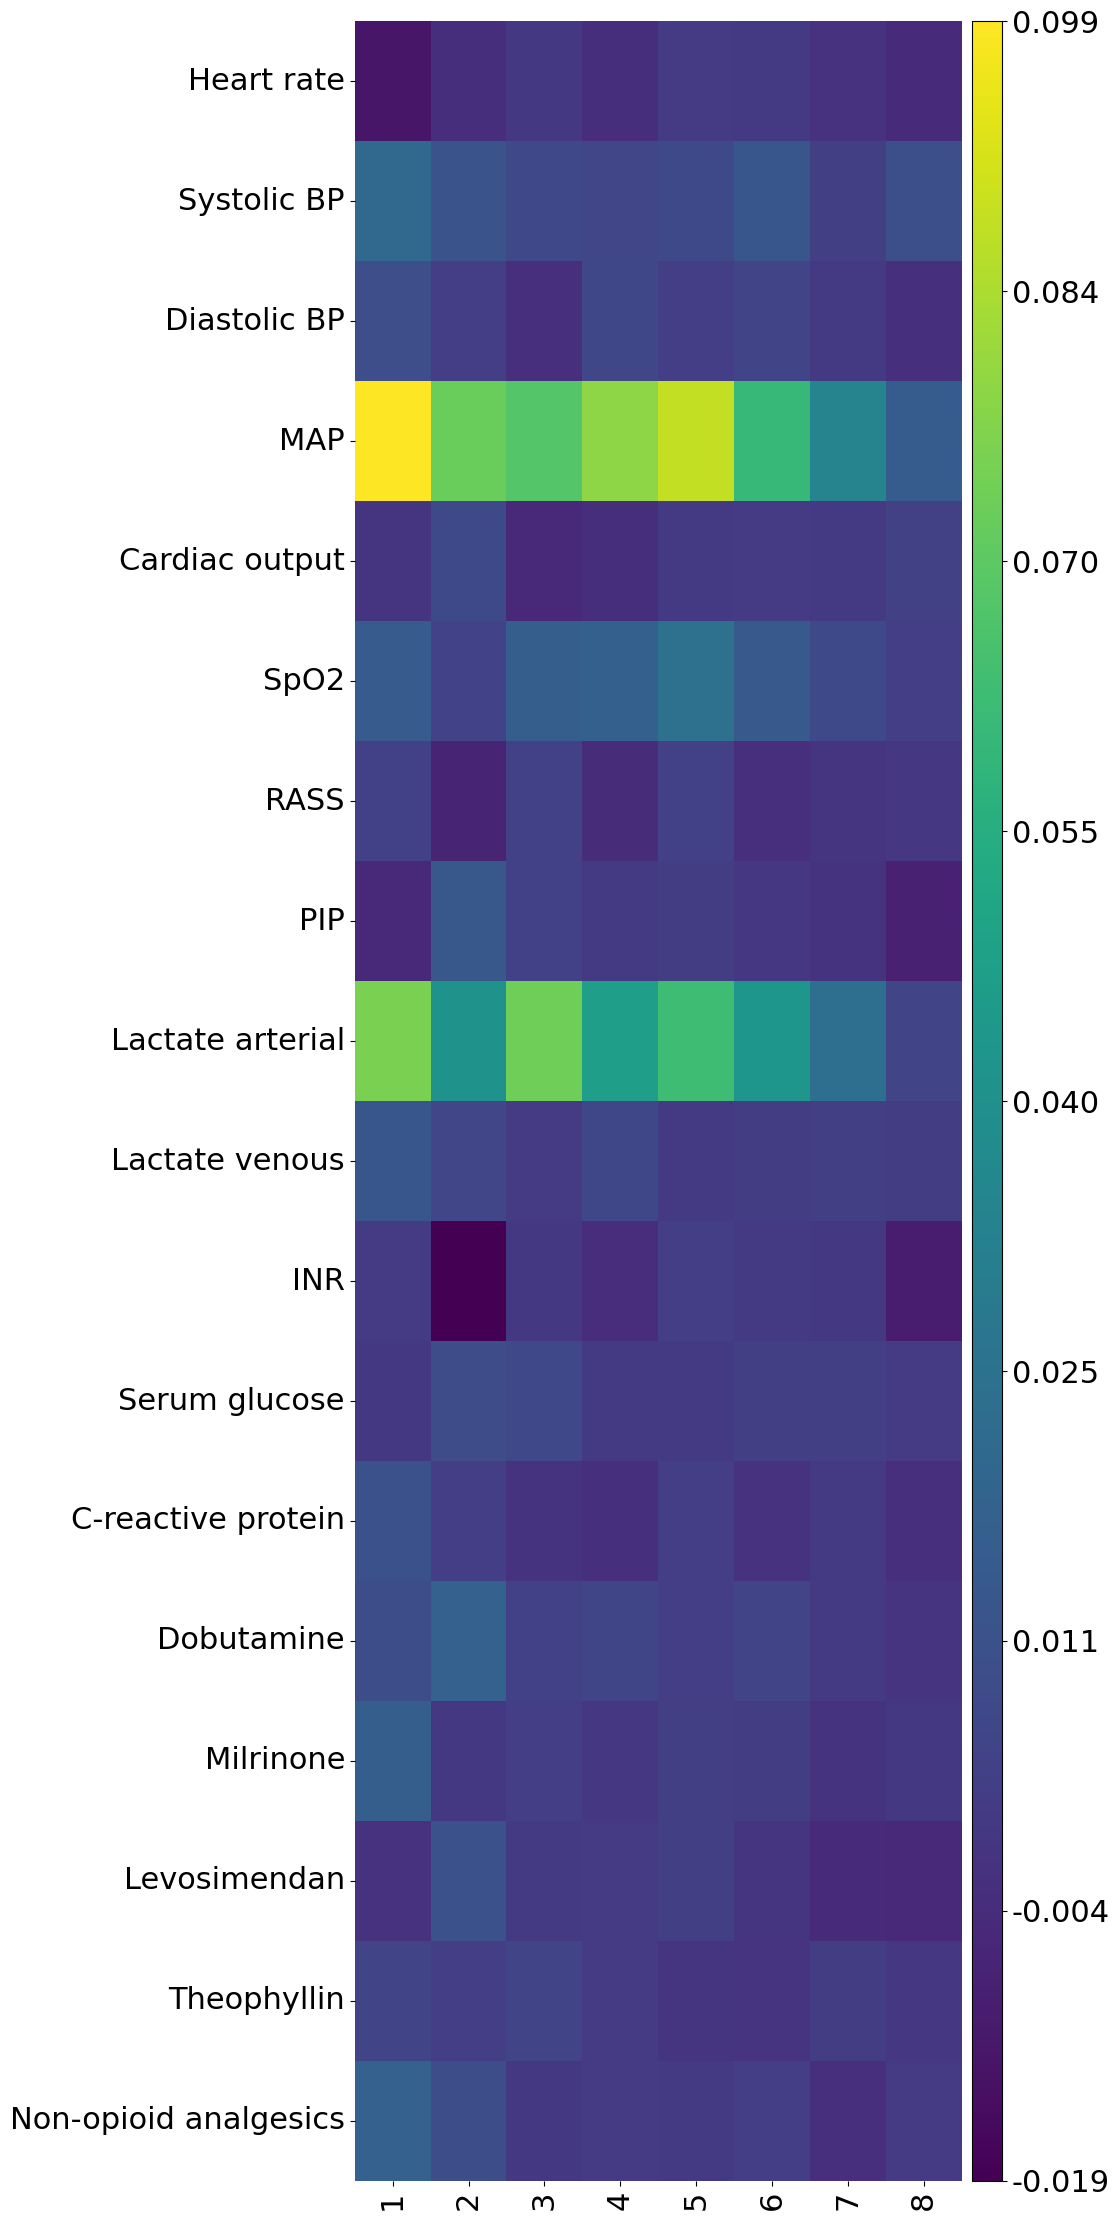

In [18]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", time, save_img=False)

**Visualize the CIRCULATORY data with normalization**

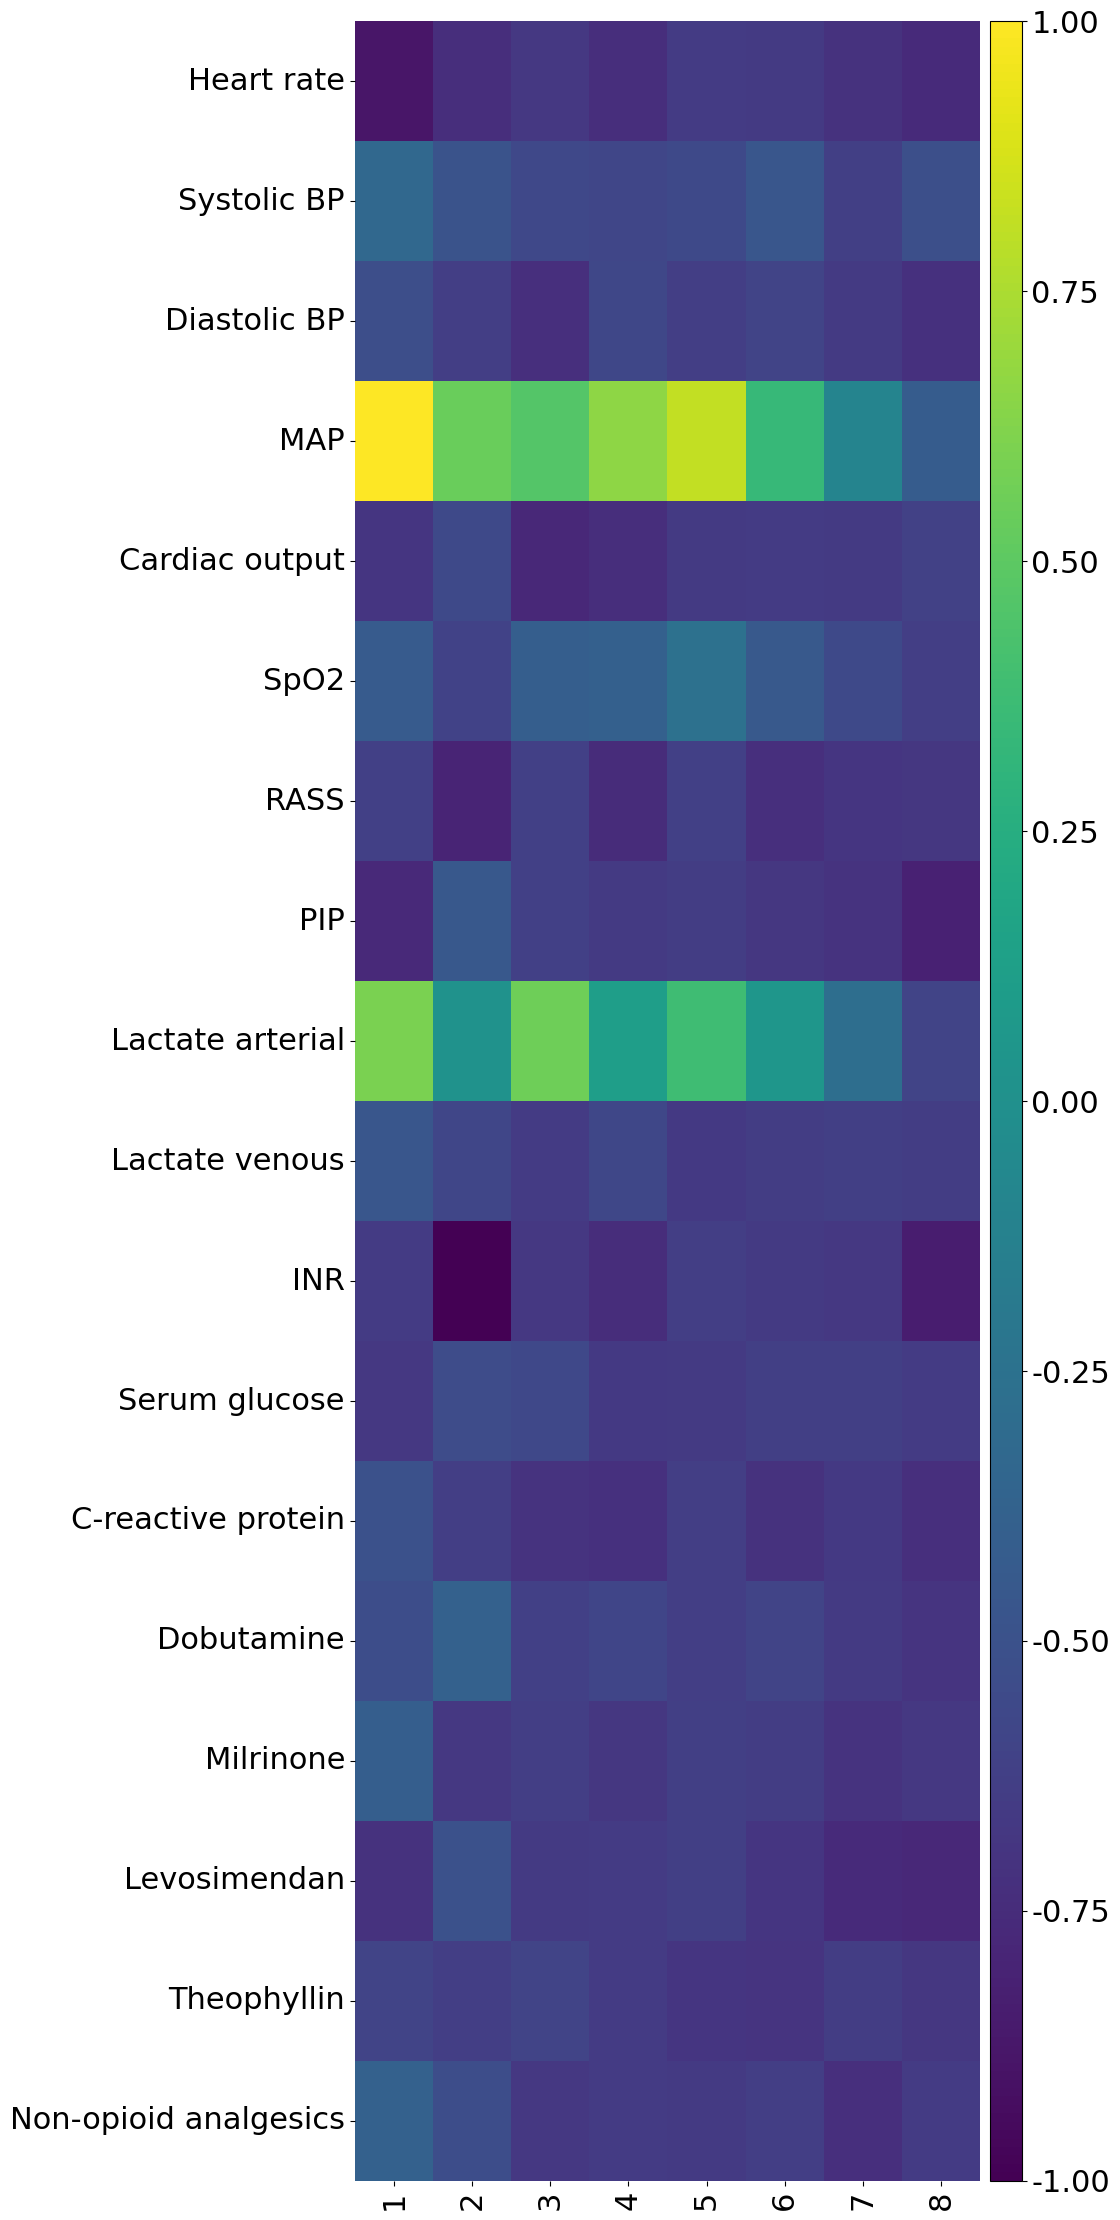

In [19]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices,
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_circ_lstm.pdf", 
               time,
               save_img=True
) 

## PATIENTS WITHOUT CIRCULATORY FAILURE

In [20]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #Circulatory patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Noncirculatory patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non CIRCULATORY data without normalization**

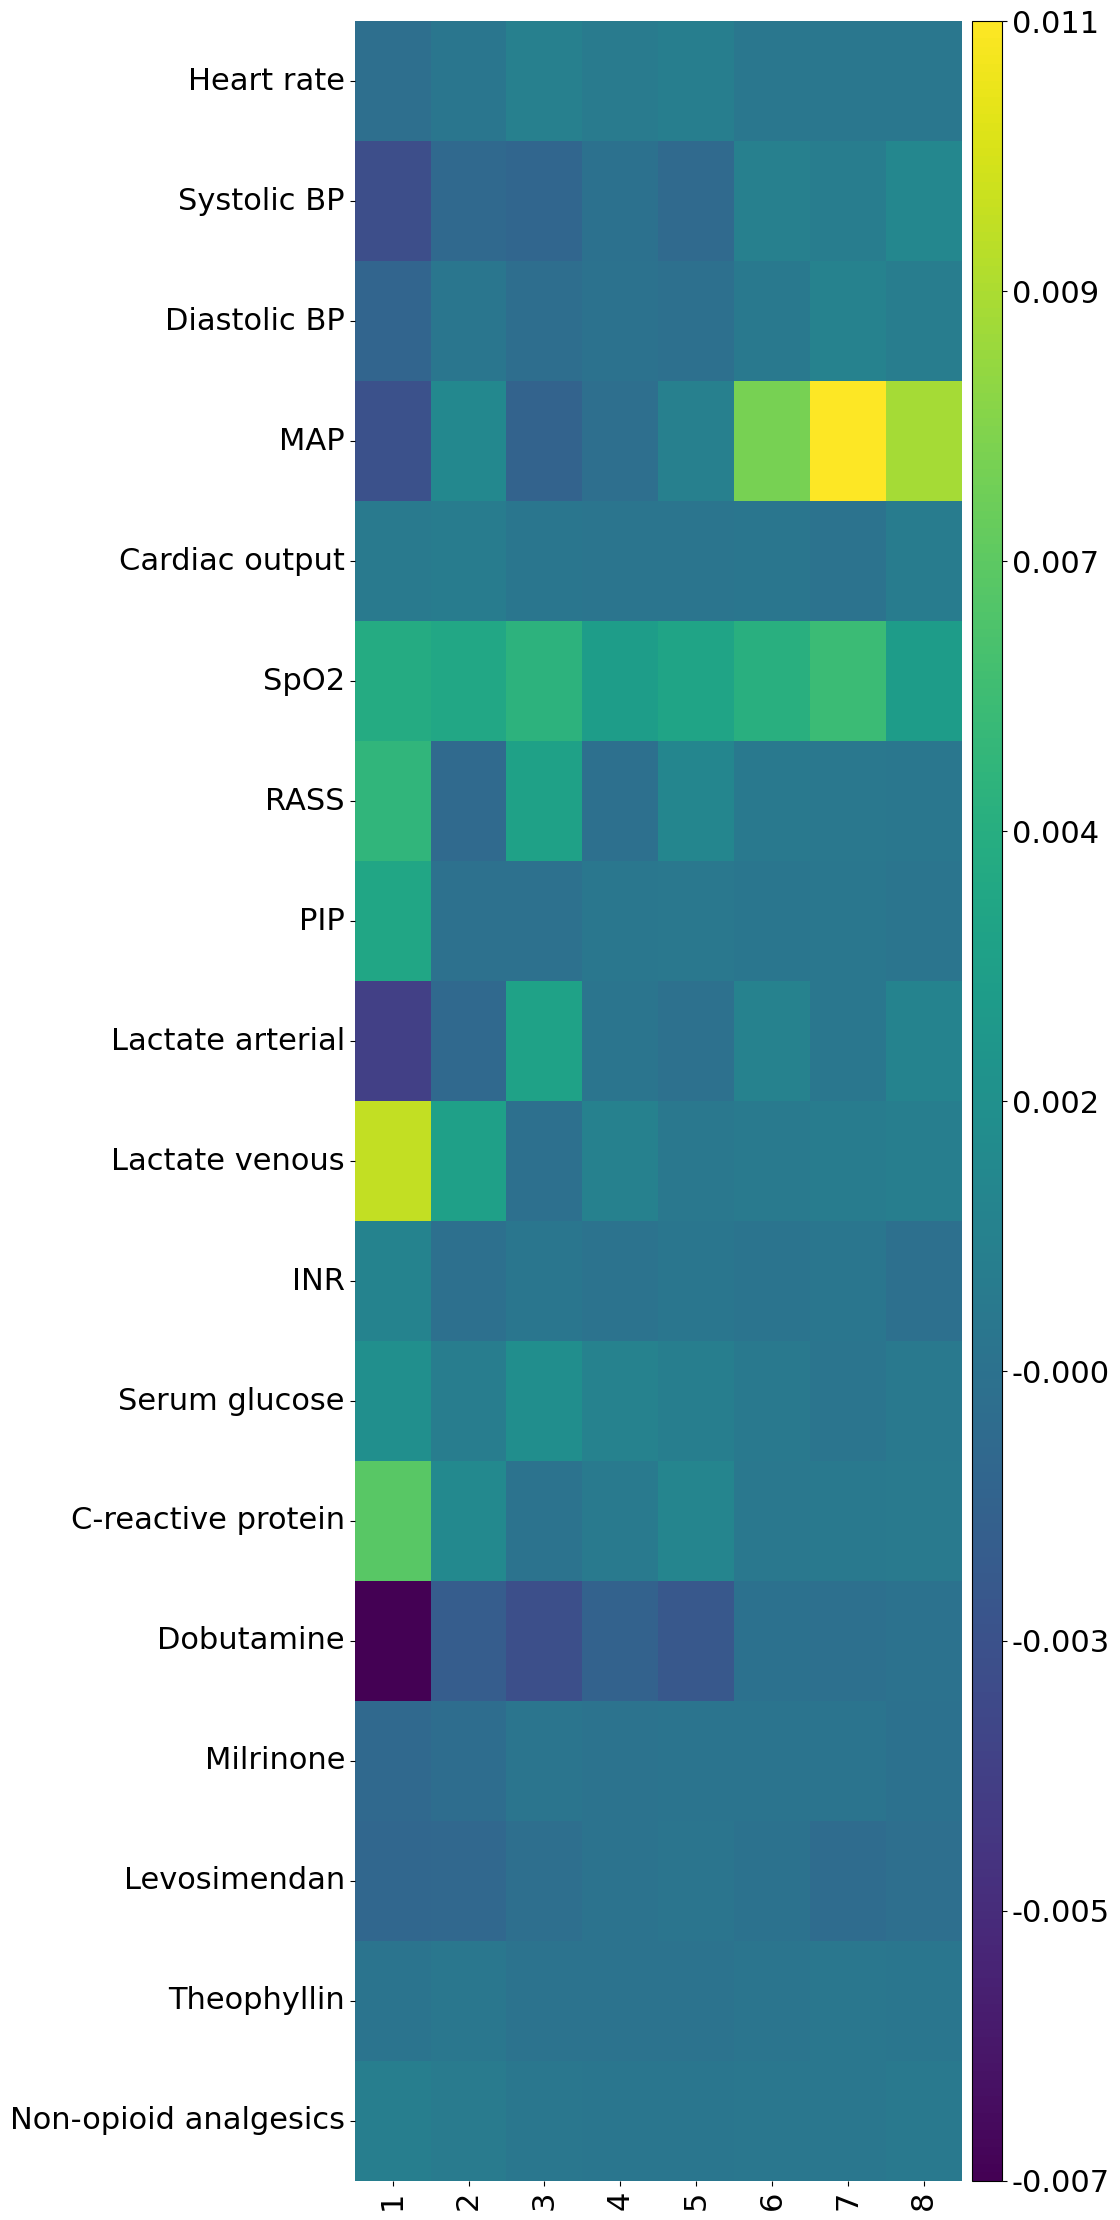

In [21]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non CIRCULATORY data with normalization**

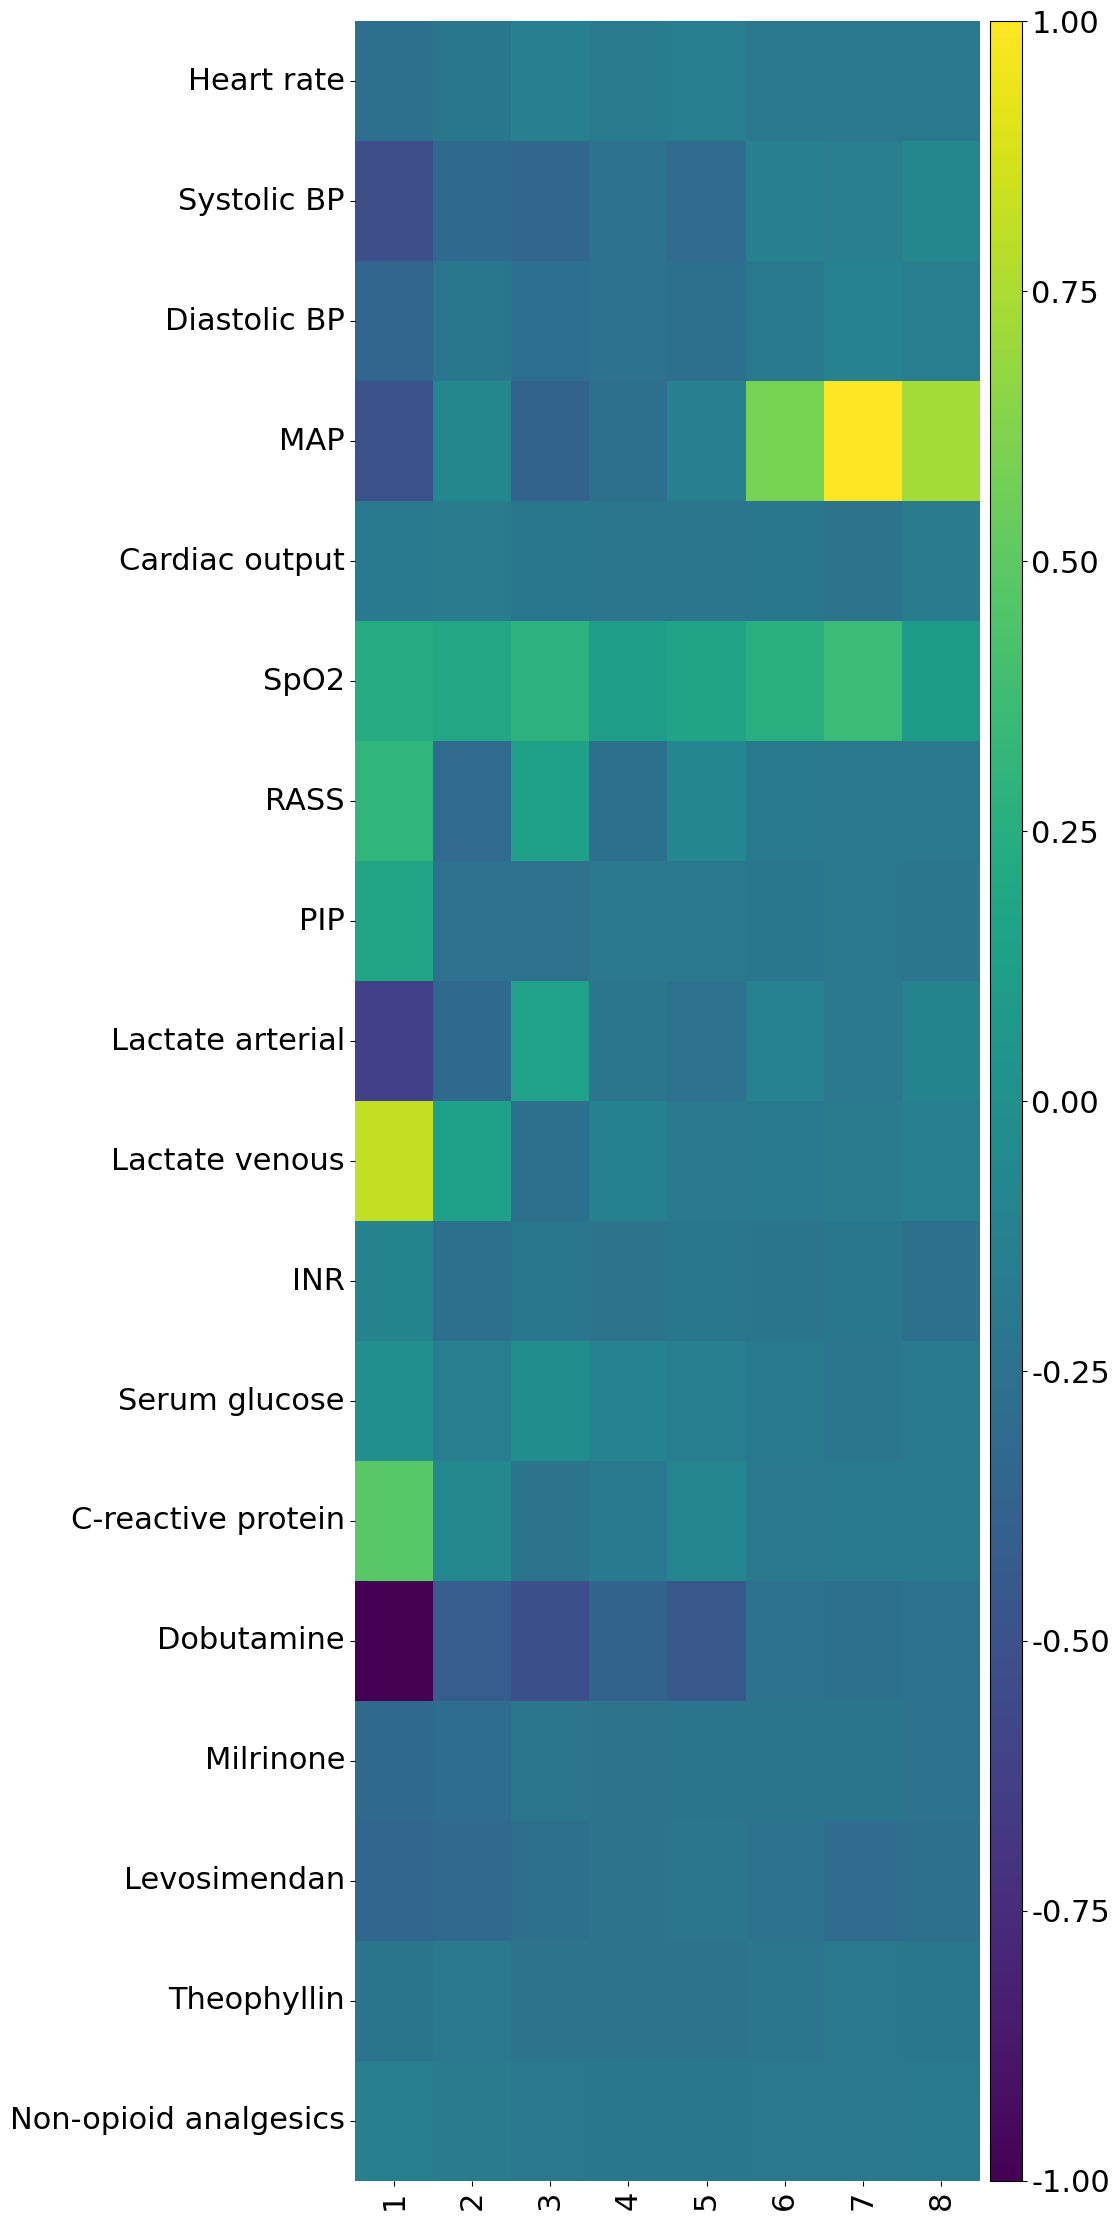

In [22]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nocirc_lstm.pdf", 
               time,
               save_img=True
) 

# SPLIT 3

In [23]:
directory = './Results_LSTM'
split = "s3"
norm = "robustNorm"

### POPULATION

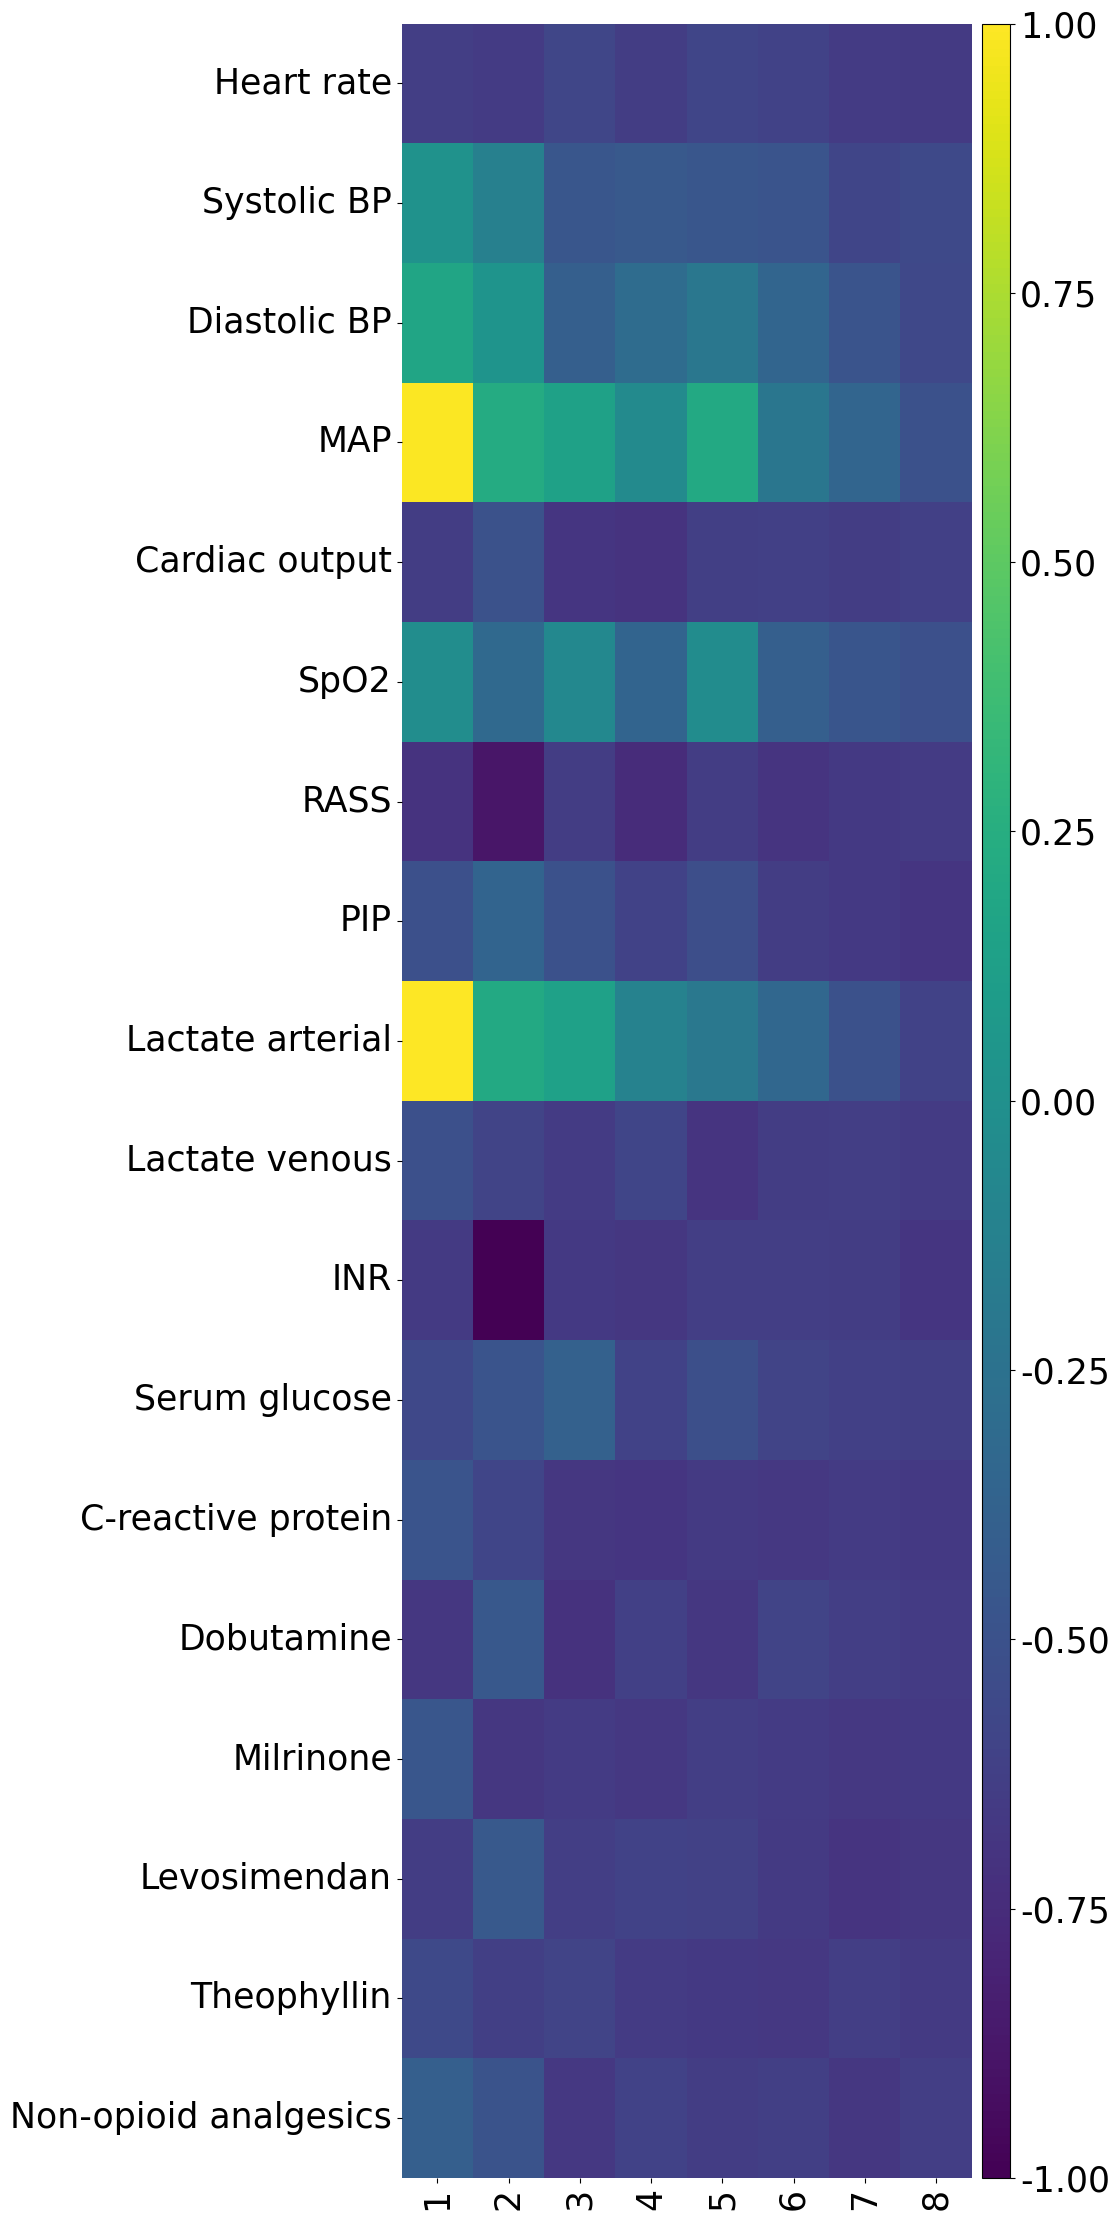

In [24]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### PATIENTS WITHOUT CIRCULATORY FAILURE 

In [25]:
ign_pat = []
X_test = np.load(f"../../../DATA/CIRCULATORY/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/CIRCULATORY/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1262, 8)

In [26]:
import copy

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #NonCirculatory patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Circulatory patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the Circulatory data without normalization**

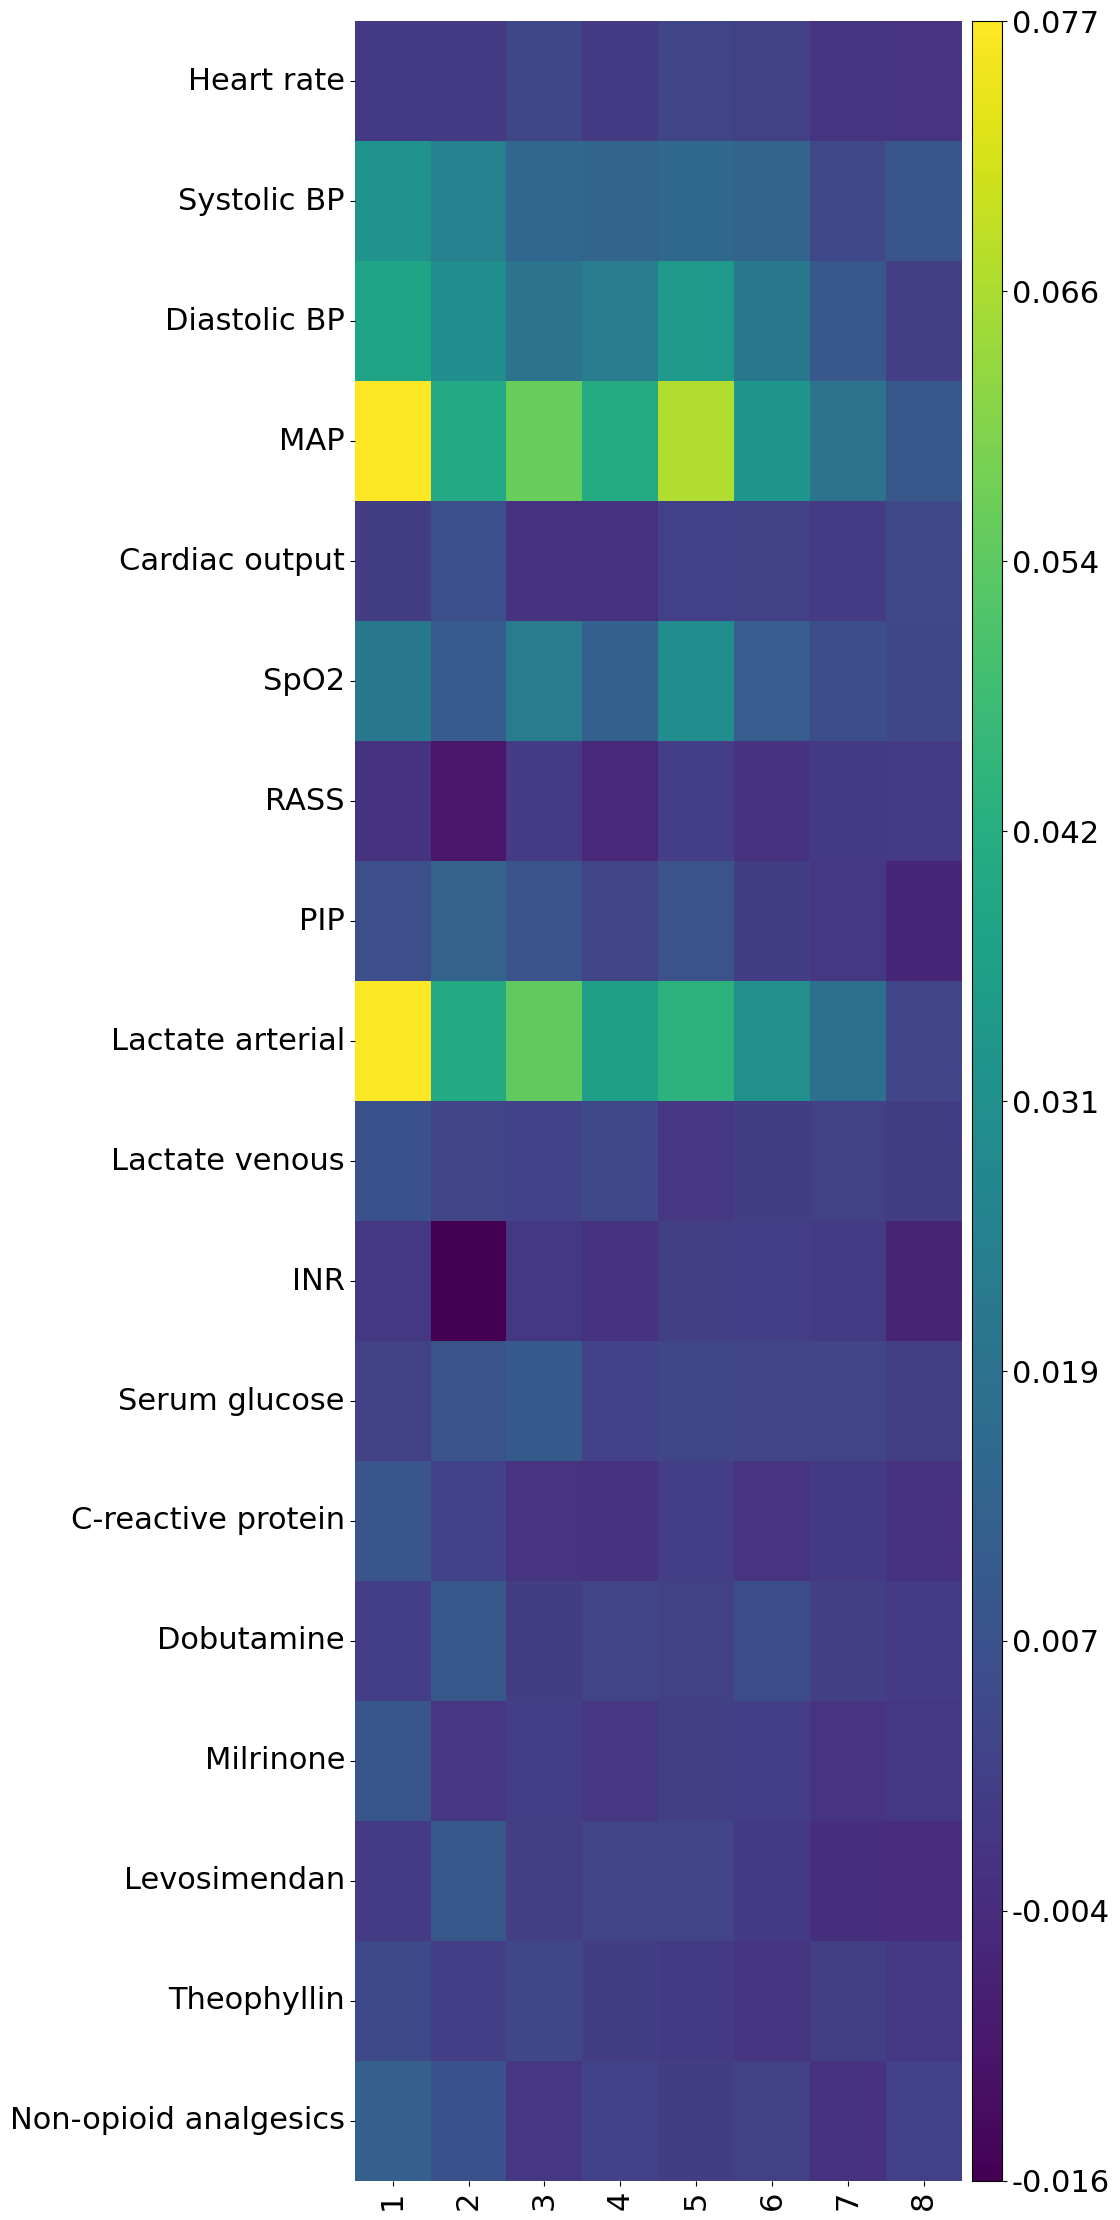

In [27]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", time, save_img=False)

**Visualize the Circulatory data with normalization**

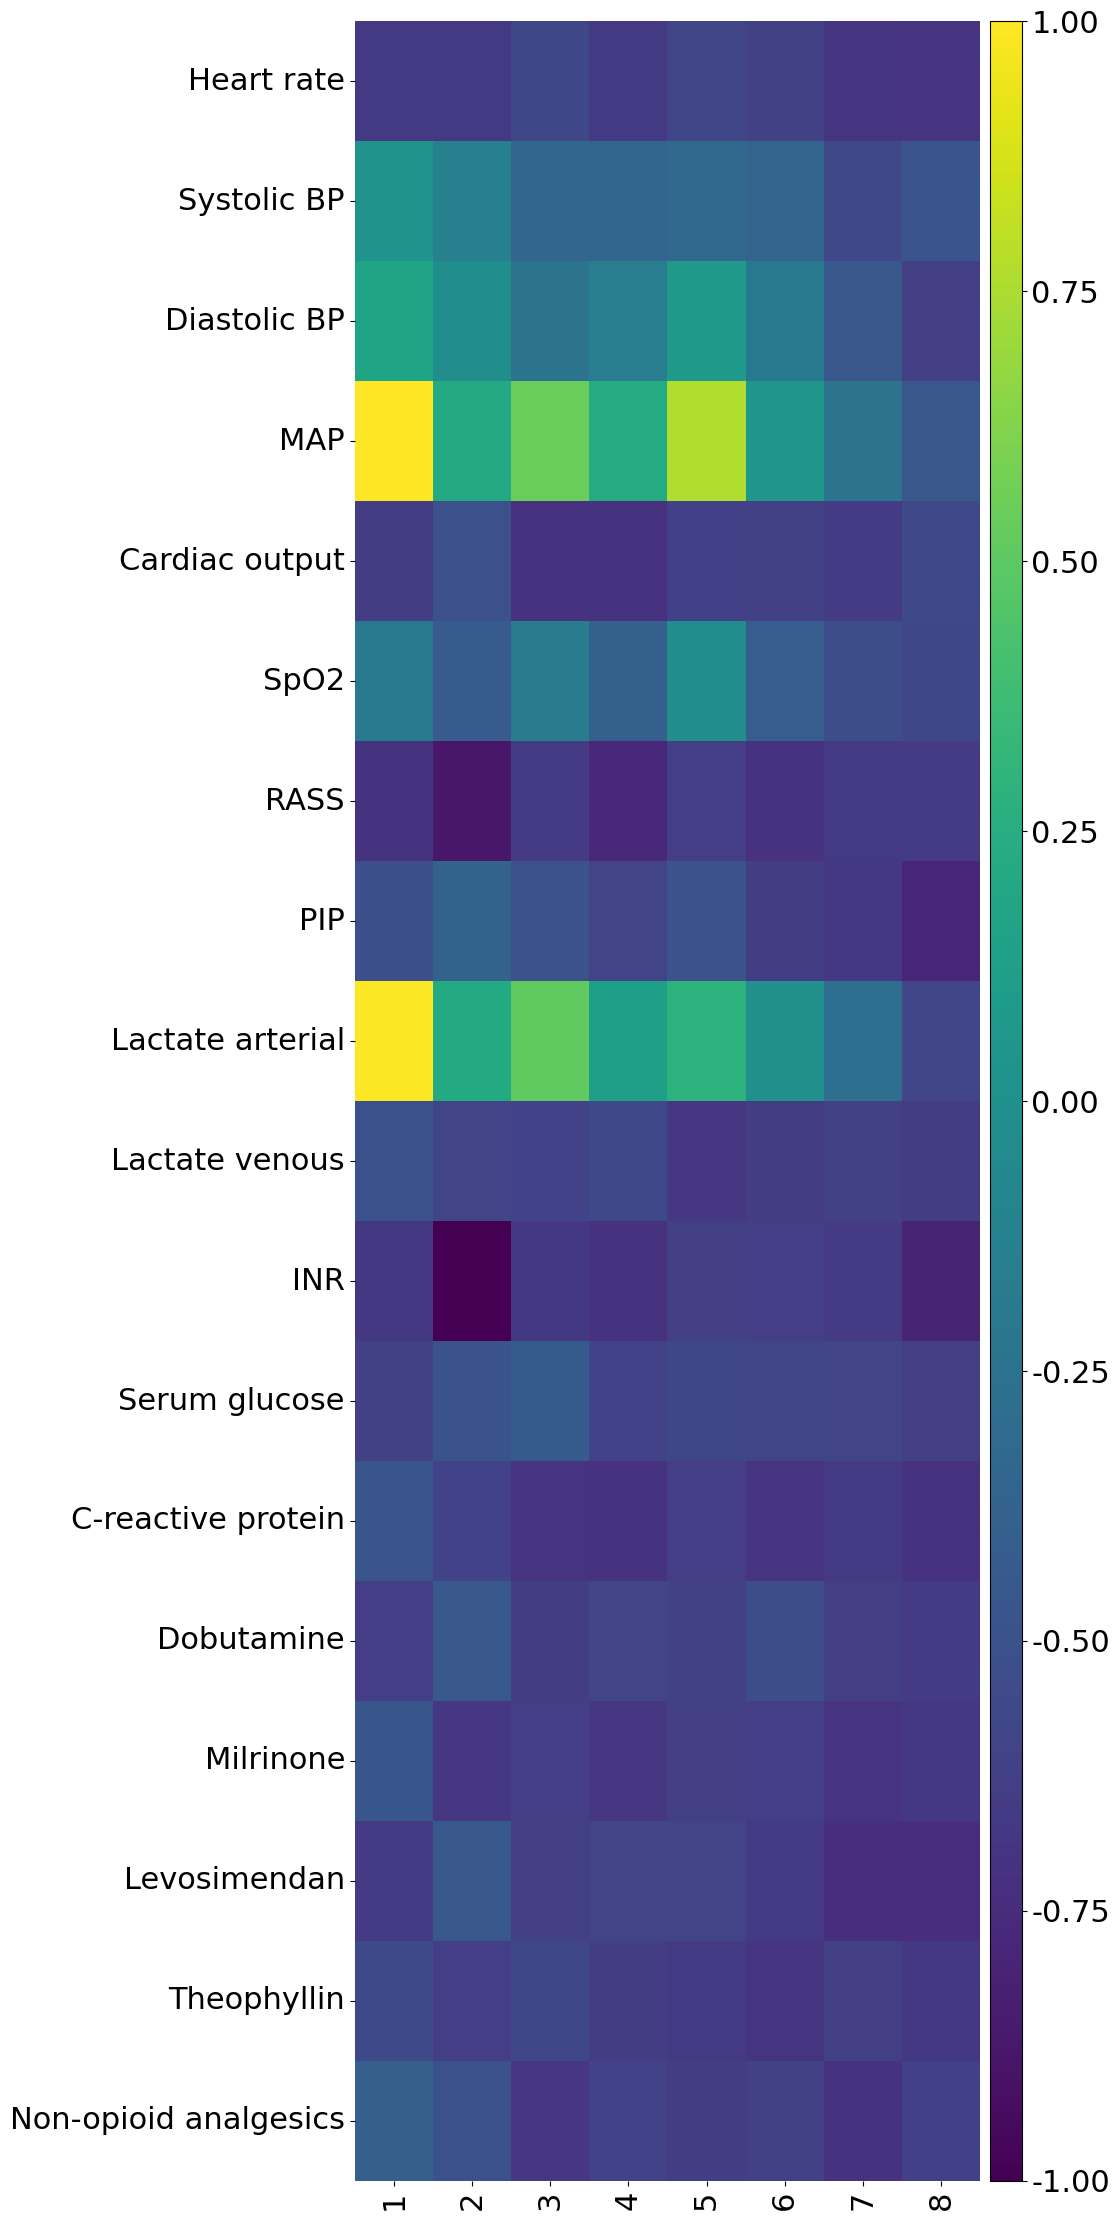

In [28]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_circ_lstm.pdf",
               time,
               save_img=True
) 

## PATIENTS WITHOUT CIRCULATORY FAILURE

In [29]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #Ciruclatory patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Noncirculatory patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non CIRCULATORY data without normalization**

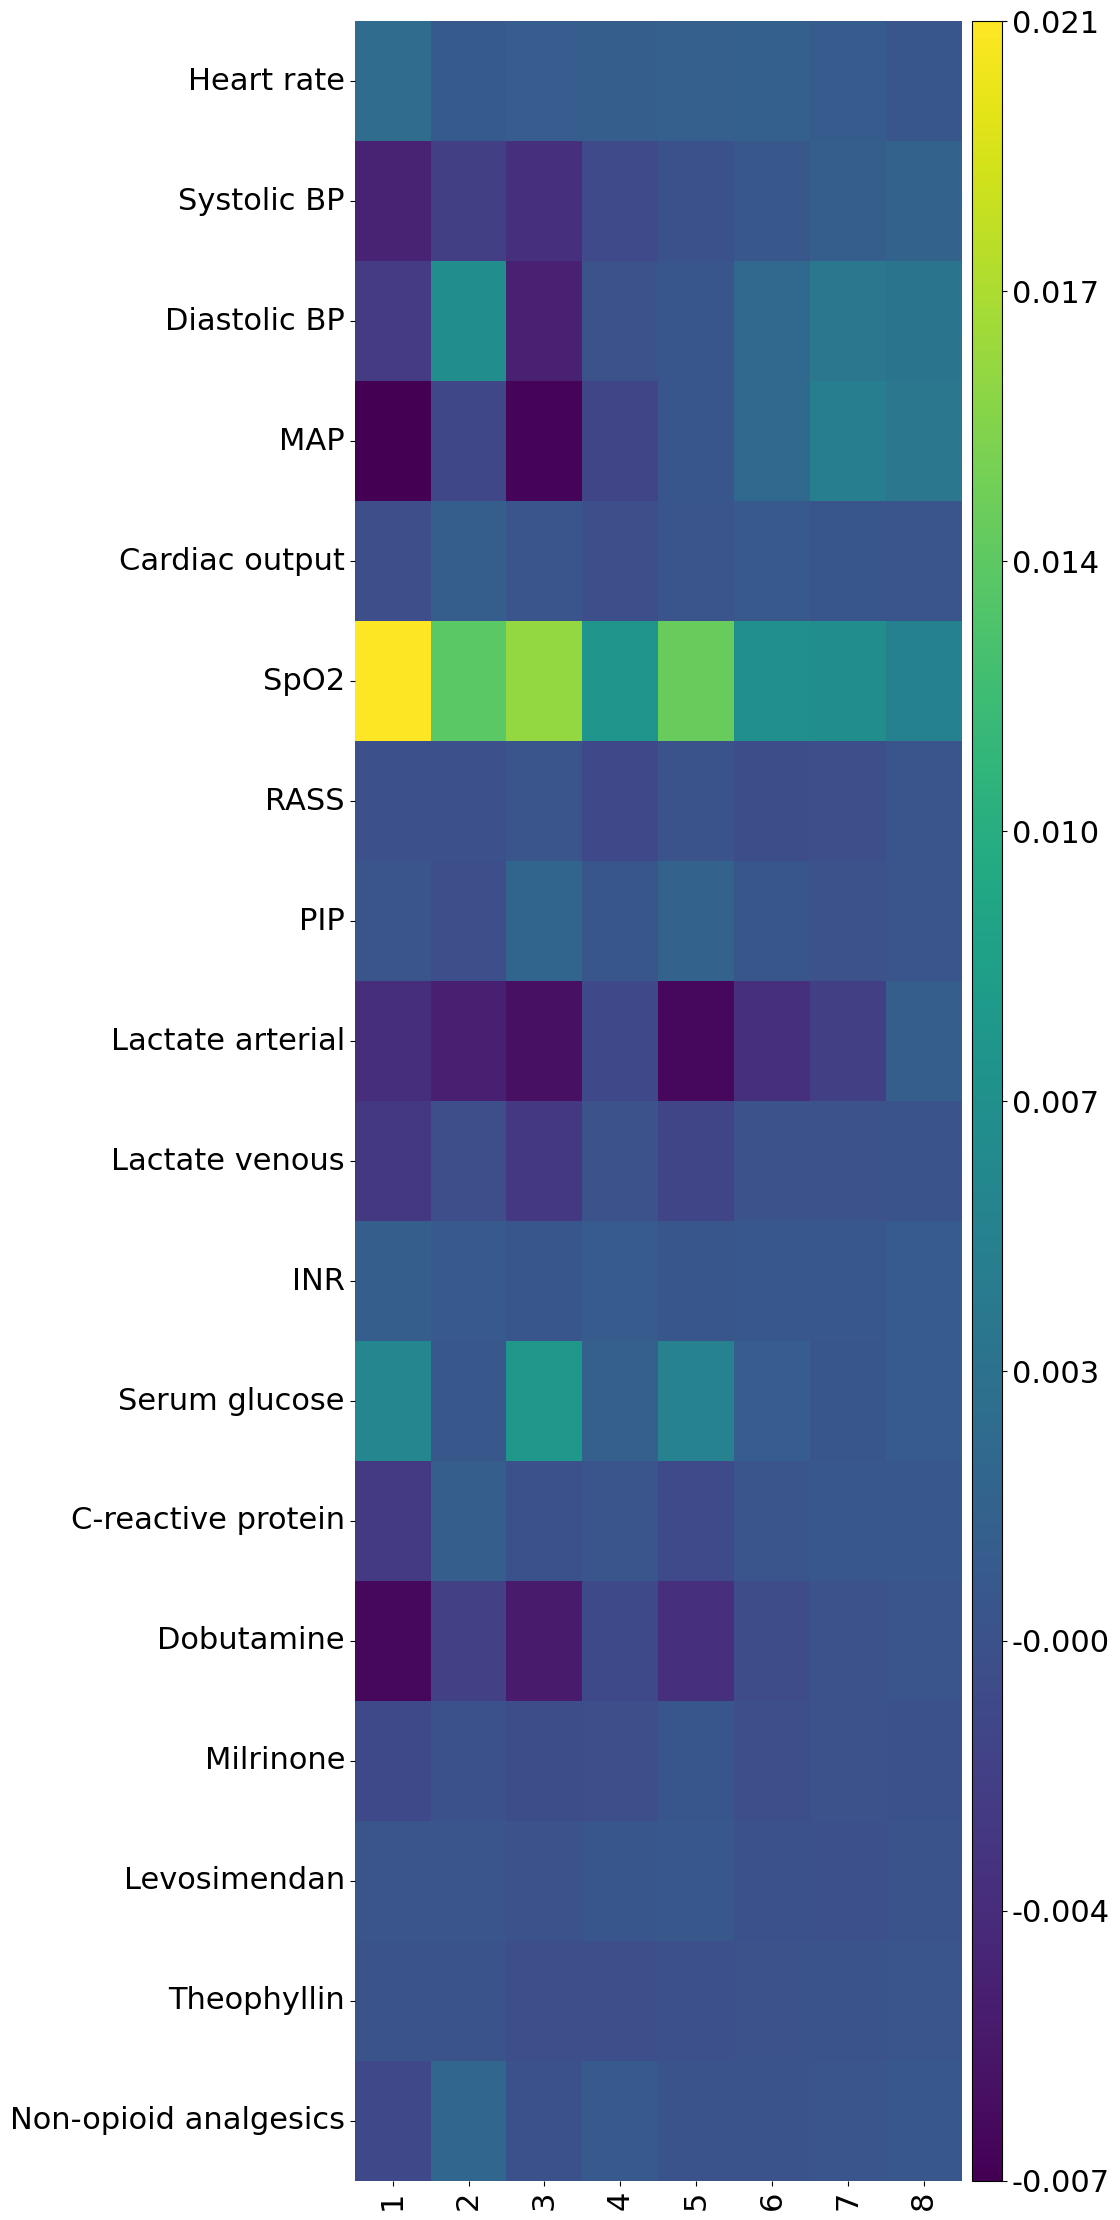

In [30]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non CIRCULATORY data with normalization**

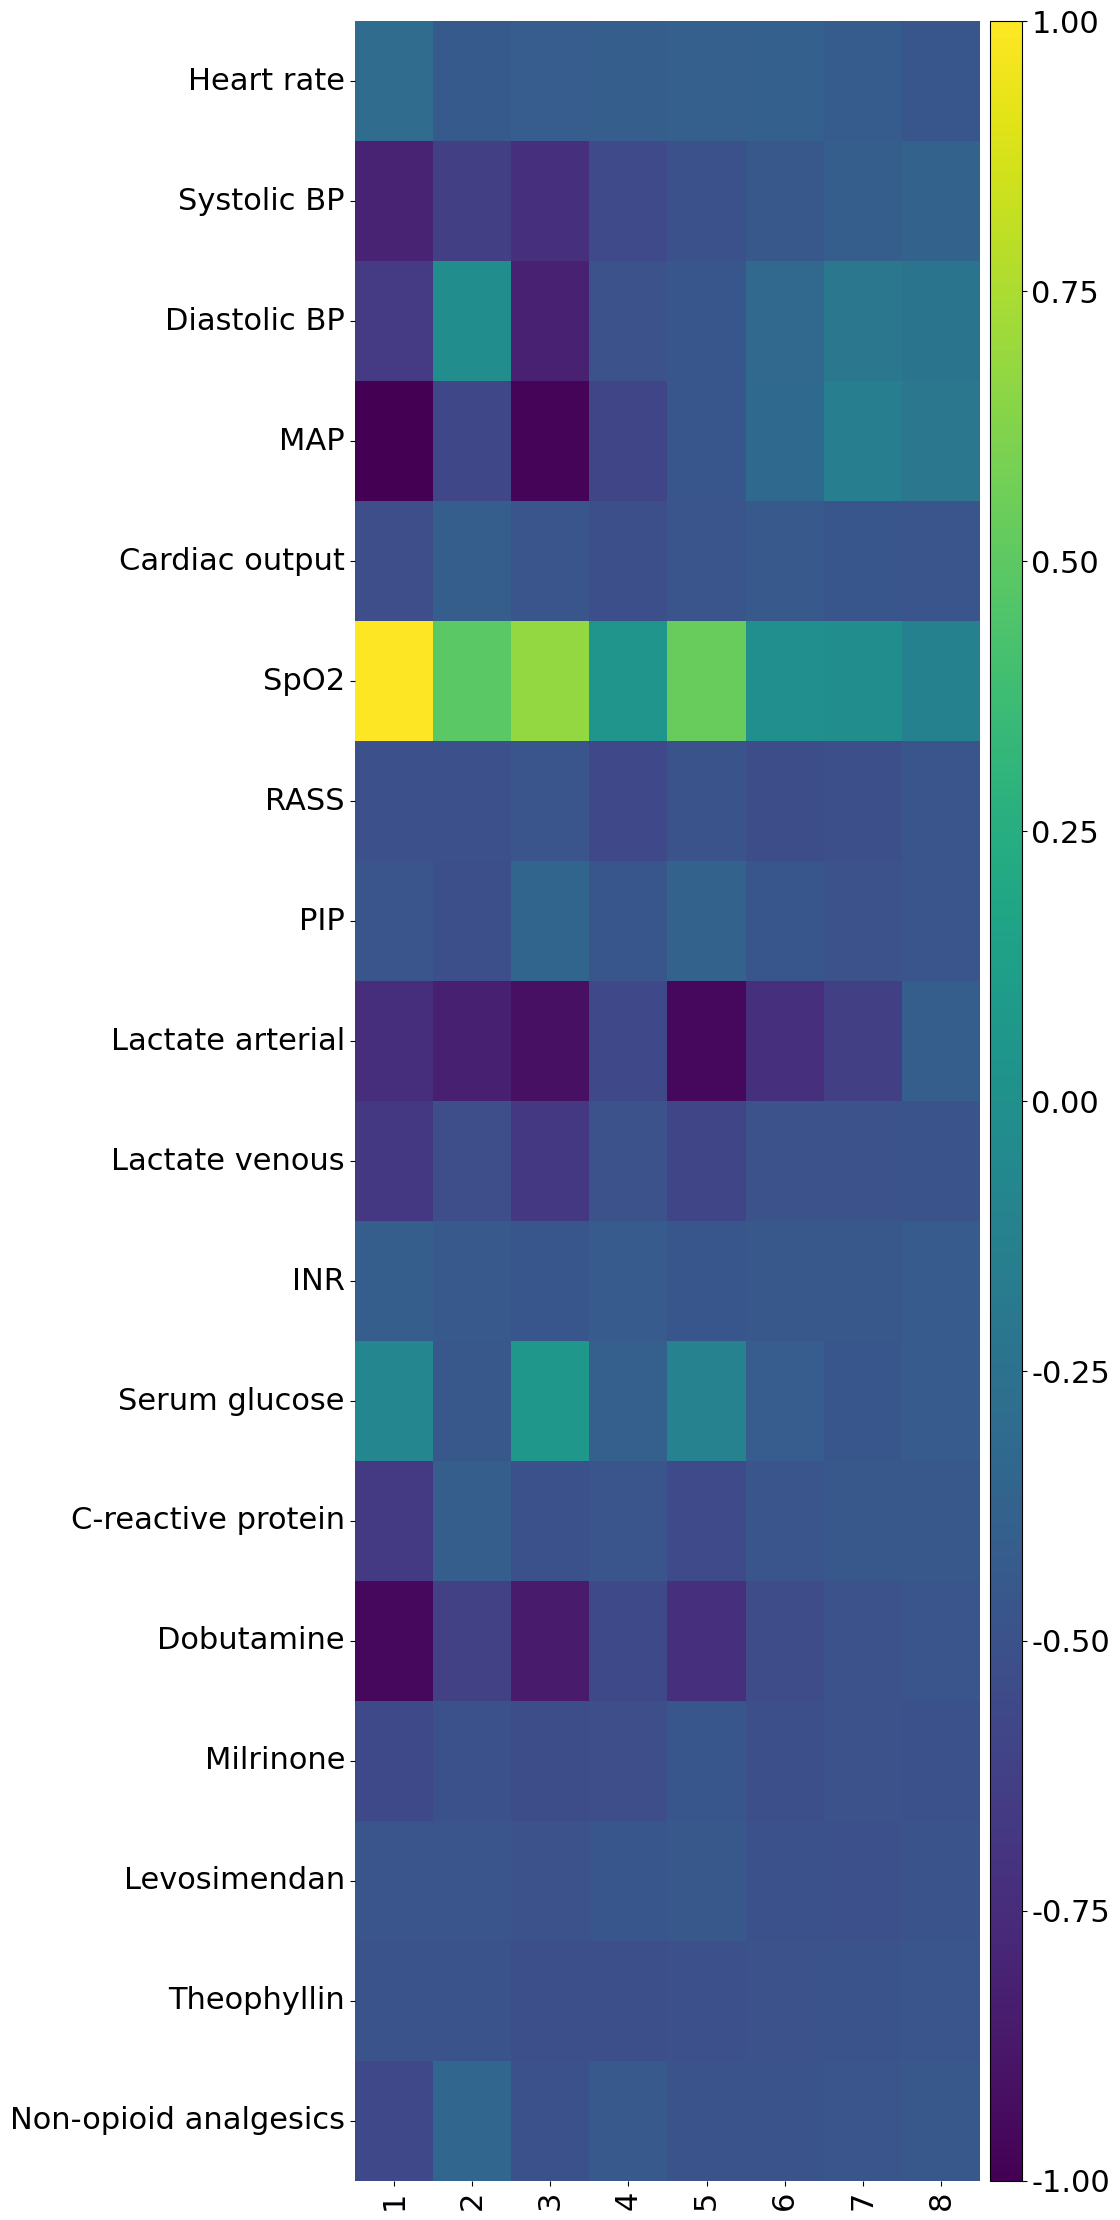

In [31]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nocirc_lstm.pdf", 
               time,
               save_img=True
)